## House Prices Prediction

### Step1 : Reading and Understanding the Data

In [1]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
from scipy import stats
from scipy.stats import norm, skew

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
#reading the dataset as a dataframe
house_df = pd.read_csv("train.csv")

In [5]:
#printing the first 5 rows of the dataframe
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**We will now inspect the various aspects of the dataframe**

In [6]:
#shape of the dataframe
house_df.shape

(1460, 81)

The dataframe has 1460 entries and 81 variables which describe these entries

In [7]:
#performing an info on the dataframe
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

From the above we can see that we do have missing values for few of the fields in our dataframe.

In [8]:
#performing the describe method on the numerical variables of the dataframe
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We can see that from the above details, the mean and the median are almost close for most of the numerical variables in our dataframe

In [9]:
#assigning and printing columns of our dataframe to a new variable
house_columns = house_df.columns
house_columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [10]:
#identifying the number of missing values in the columns of our dataframe
house_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

we have few of the columns having a lot of NA values. We will deal with the same later.

In [11]:
#identifying rows having all of them as missing values
house_df.isnull().all(axis=1).sum()

0

In [12]:
#lets now look at the percentage of missing values in each column
house_na = round(100*(house_df.isnull().sum()/len(house_df.index)),2)
house_na = house_na.drop(house_na[house_na == 0].index).sort_values(ascending = False)
house_missing_data = pd.DataFrame({'Missing_Ratio' : house_na})
house_missing_data

,Missing_Ratio
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageType,5.55
GarageFinish,5.55
GarageQual,5.55


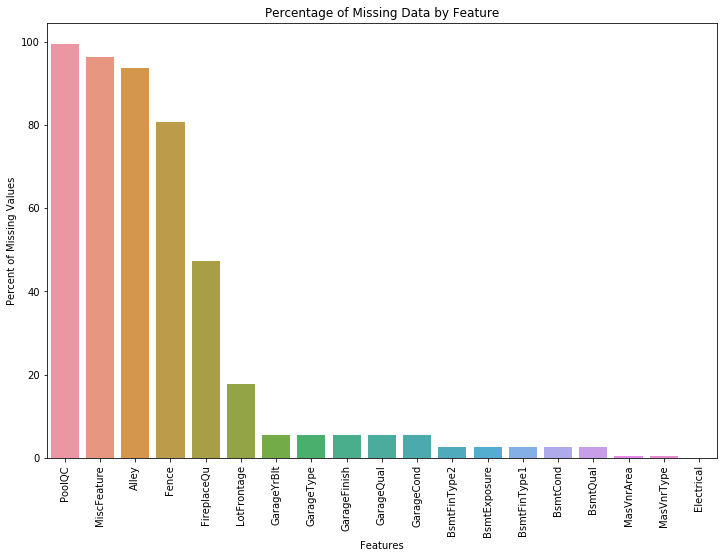

In [13]:
#visualizing the missing percentages for different fetaures
plt.figure(figsize=(12,8))
plt.xticks(rotation='90')
sns.barplot(x = house_na.index, y = house_na)
plt.xlabel('Features')
plt.ylabel('Percent of Missing Values')
plt.title('Percentage of Missing Data by Feature')
plt.show()

From the above graph we can see that many fields have missing values. We will start imputing them or dropping them in the next steps.

In [14]:
#Lets check the data definition what each feature means and impute or drop the missing values after this analysis

#Data description Says NA is No Pool for PoolQC. Hence we will impute with None since it means the houses have No Pool
house_df['PoolQC'] = house_df['PoolQC'].fillna('No_Pool')

#lets check and perform for the remaining features as well
#MiscFeature : Data definition says NA means 'No Misc Feature'
house_df['MiscFeature'] = house_df['MiscFeature'].fillna('No_Misc')

#Alley : Data definition says NA means 'No Alley Access'
house_df['Alley'] = house_df['Alley'].fillna('No_Alley')

#Fence : Data definition says NA means 'No Fence'
house_df['Fence'] = house_df['Fence'].fillna('No_Fence')

#FireplaceQu : Data definition says NA means 'No Fireplace'
house_df['FireplaceQu'] = house_df['FireplaceQu'].fillna('No_Fireplace')

We have dealt for the features which have missing values more than 40%. We will check for the reamining features now and impute or remove them as needed.

In [15]:
#LotFrontage : Linear feet of street connected to property
#Since LotFrontage is the linear feet of street connected to a property, we will impute the values as follows :

Group the values in terms of their neighbourhood and take the median of the LotFrontage of the neighbourhood as the feet of the street connected to property will be similar in a given neighbourhood.

In [16]:
house_df['LotFrontage'] = house_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))

In [17]:
#For GarageType, GarageFinish, GarageQual and GarageCond, NA means No Garage.Hence we will impute the NA values with the same.
for col in ('GarageFinish', 'GarageType', 'GarageQual', 'GarageCond'):
    house_df[col] =house_df[col].fillna('No_Garage')

In [18]:
#Replacing the NA values in GarageYrBlt with 0 since No Garage means no cars
house_df['GarageYrBlt'] = house_df['GarageYrBlt'].fillna(0)

In [19]:
#For BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual, NA means No_Basement from the data dictionary.
#Hence imputing the same.
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    house_df[col] = house_df[col].fillna('No_Basement')

In [20]:
#For MasVnrArea and MasVnrType : NA most likely means there is no masonry veneer for these houses.
#We will impute None for the Type and 0 for the area
house_df['MasVnrArea'] = house_df['MasVnrArea'].fillna(0)
house_df['MasVnrType'] = house_df['MasVnrType'].fillna('None')

In [21]:
#For Electrical : It has NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
house_df['Electrical'] = house_df['Electrical'].fillna(house_df['Electrical'].mode()[0])

In [22]:
#Lets now check for the percentage of missing values in the dataframe
house_na = round(100*(house_df.isnull().sum()/len(house_df.index)),2)
house_na

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath 

All the missing values in our dataframe are now treated.

In [23]:
#MSSubClass and OverallCond are numerical variables but from our data dictionary they look like categorical variables
#Hence converting them to categorical variables
house_df['MSSubClass'] = house_df['MSSubClass'].apply(str)
house_df['OverallCond'] = house_df['OverallCond'].apply(str)

In [24]:
#lets make the ID column as the index of the dataframe
house_df.set_index('Id', inplace = True)

In [25]:
#displaying the first 5 rows of our dataframe
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No_Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No_Pool,No_Fence,No_Misc,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,No_Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No_Pool,No_Fence,No_Misc,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No_Pool,No_Fence,No_Misc,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,No_Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No_Pool,No_Fence,No_Misc,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,No_Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No_Pool,No_Fence,No_Misc,0,12,2008,WD,Normal,250000


In [26]:
#Lets also check the number of unique values in our categorical variables and if we have any special characters or symbols
#lets create a two different datasets of numerical and categorical data
numeric_data = house_df.select_dtypes(include = np.number)
categorical_data = house_df.select_dtypes(exclude = np.number)

In [27]:
#printing the shape of the numerical data set and categorical data set
print("Shape of Original Dataset : ", house_df.shape)
print("Shape of Numerical Dataset : ", numeric_data.shape)
print("Shape of Categorial Dataset : ", categorical_data.shape)

Shape of Original Dataset :  (1460, 80)
Shape of Numerical Dataset :  (1460, 35)
Shape of Categorial Dataset :  (1460, 45)


In [28]:
#lets see the number of unique values in categorical variables
cat_cols = categorical_data.columns
categorical_data[cat_cols].nunique().sort_values()

CentralAir        2
Street            2
Utilities         2
PavedDrive        3
LandSlope         3
Alley             3
LandContour       4
GarageFinish      4
PoolQC            4
ExterQual         4
MasVnrType        4
LotShape          4
KitchenQual       4
BsmtCond          5
BsmtQual          5
Electrical        5
ExterCond         5
BsmtExposure      5
HeatingQC         5
BldgType          5
Fence             5
MiscFeature       5
LotConfig         5
MSZoning          5
GarageQual        6
GarageCond        6
FireplaceQu       6
Foundation        6
SaleCondition     6
RoofStyle         6
Heating           6
BsmtFinType2      7
BsmtFinType1      7
Functional        7
GarageType        7
RoofMatl          8
HouseStyle        8
Condition2        8
SaleType          9
OverallCond       9
Condition1        9
Exterior1st      15
MSSubClass       15
Exterior2nd      16
Neighborhood     25
dtype: int64

### Step2 : Visualizing the Data

In [29]:
num_variables = list(numeric_data.columns)
cat_variables = list(categorical_data.columns)
print("Numerical Variables : ", num_variables)
print("Categorical Variables : ", cat_variables)

Numerical Variables :  ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Categorical Variables :  ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Firepla

In [30]:
#plotting the desnsity of all the numerical features
def plots(data, num_vars):
    plt.figure(figsize = (15, 50))
    for i, nv in enumerate(num_vars):
        plt.subplot(20, 4, i + 1)
        plt.hist(data[nv], color = 'Green', bins = len(data[nv].unique()))
        plt.title(nv)
        plt.ylabel('Density')    

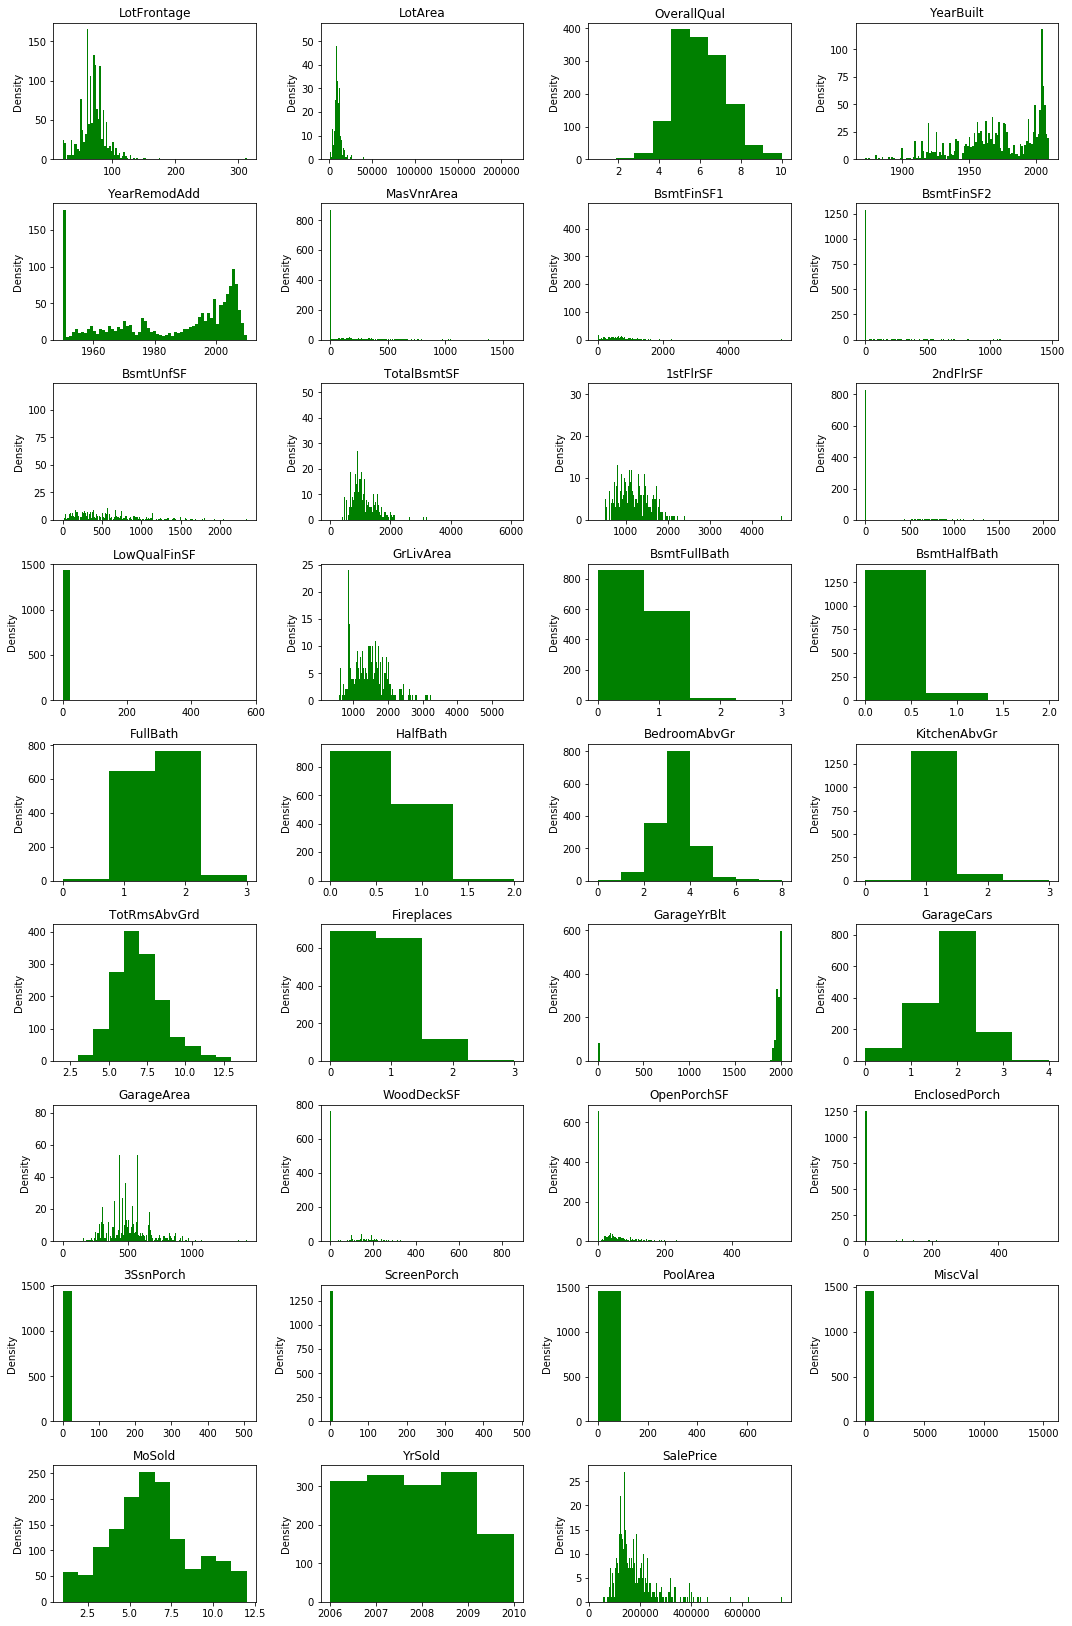

In [31]:
plots(house_df, num_vars = num_variables)
plt.tight_layout()

We can make the following observations from the density plot of numerical variables:

1. The sale price which is our target variable looks like a skewed distribution.
2. Few of the features like 3SsnPorch, EnclosedPorch, ScreenPorch, PoolArea, MiscVal, LowQualFinSF, 2ndFlrSF, BsmtFinSF2, MasVnrArea does not show a distribution at all. For few of the features , the values are just concentrated for a single value.
3. Most of the other features show some distribution but they do not seem like a normal distribution

In [32]:
#plotting the density of all the categorical features
def plots2(data, cat_vars):
    plt.figure(figsize=(15,50))
    for i, cat in enumerate(cat_vars):
        plt.subplot(20, 5, i + 1)
        sns.countplot(data[cat], color = 'Blue')
        plt.title(cat)
        plt.ylabel('Density')

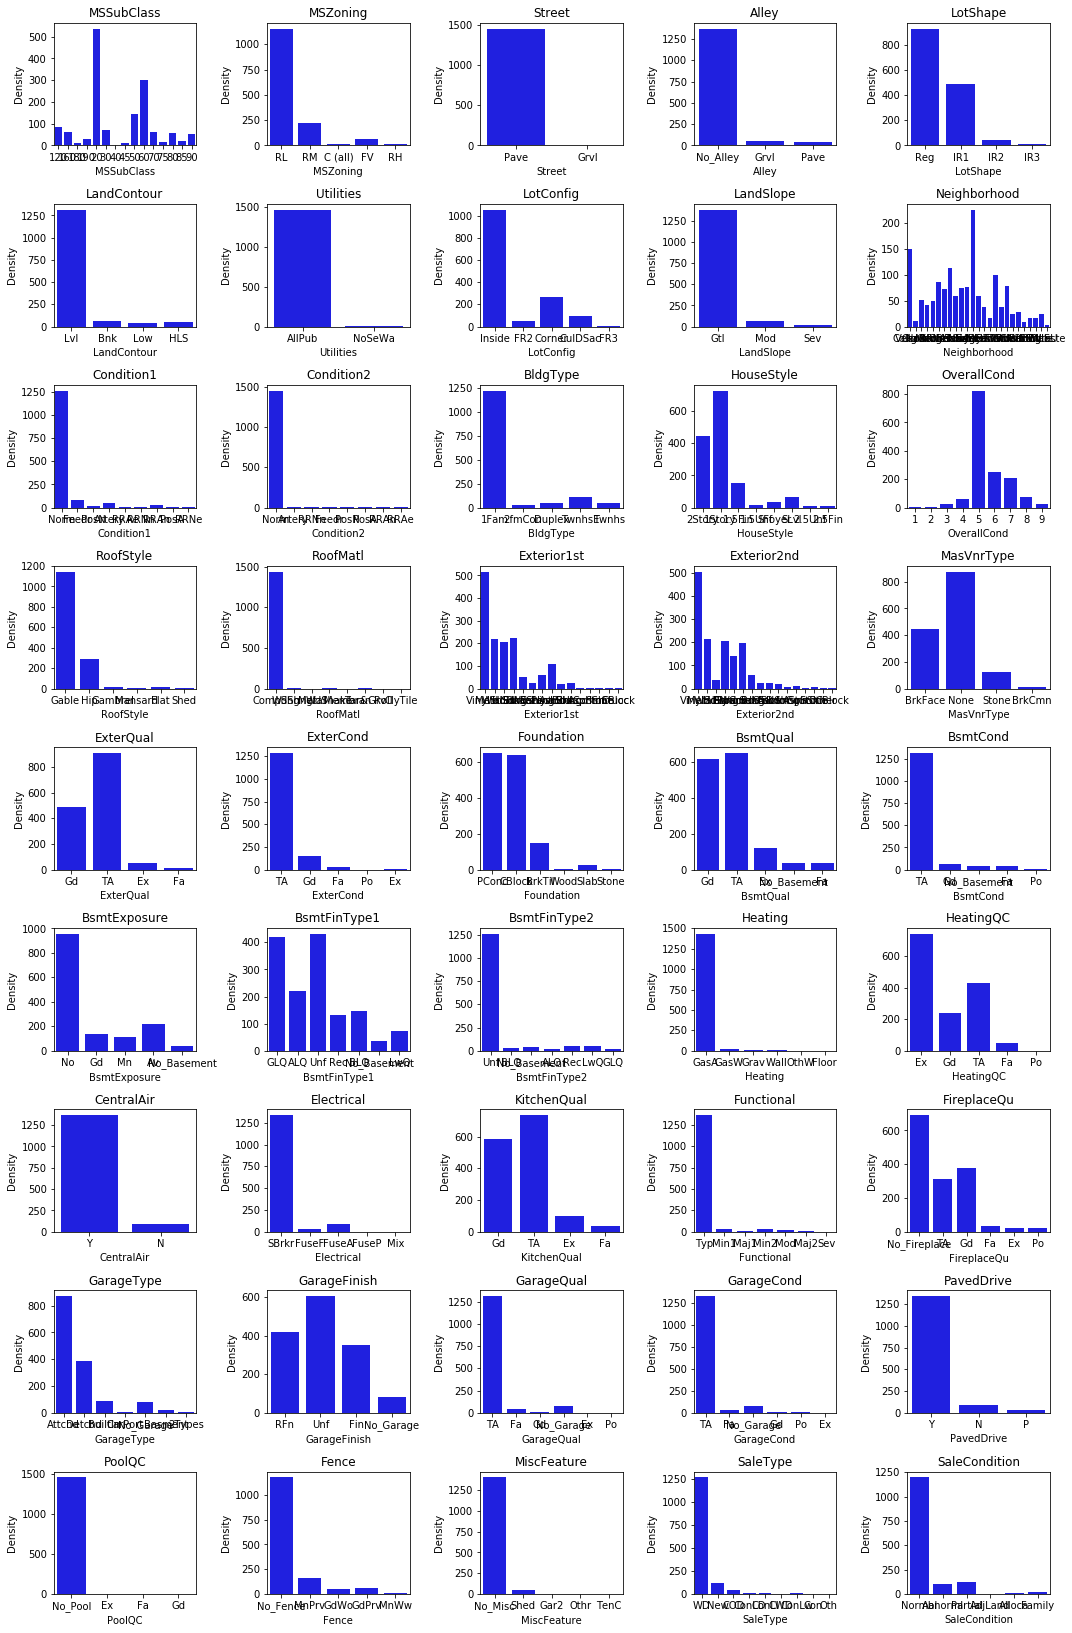

In [33]:
plots2(house_df, cat_vars = cat_variables)
plt.tight_layout()

We can make the following observations from the density plot of categorical variables:

1. For few of the features, the values are concentrated on one value.
2. Some of the features have a good distribution like Neighbourhood, Exterior1st and Exterior2nd

We will also analyze few of the categorical variables and numerical variables individually with our target variable SalePrice

In [34]:
#lets first start with categorical variables
def plots3(data, cat_vars):
    plt.figure(figsize=(25, 25))
    for i, cat in enumerate(cat_vars):
        plt.subplot(6,4,i+1)
        sns.barplot(x = data['SalePrice'], y = data[cat], orient = 'h', color = 'Blue')

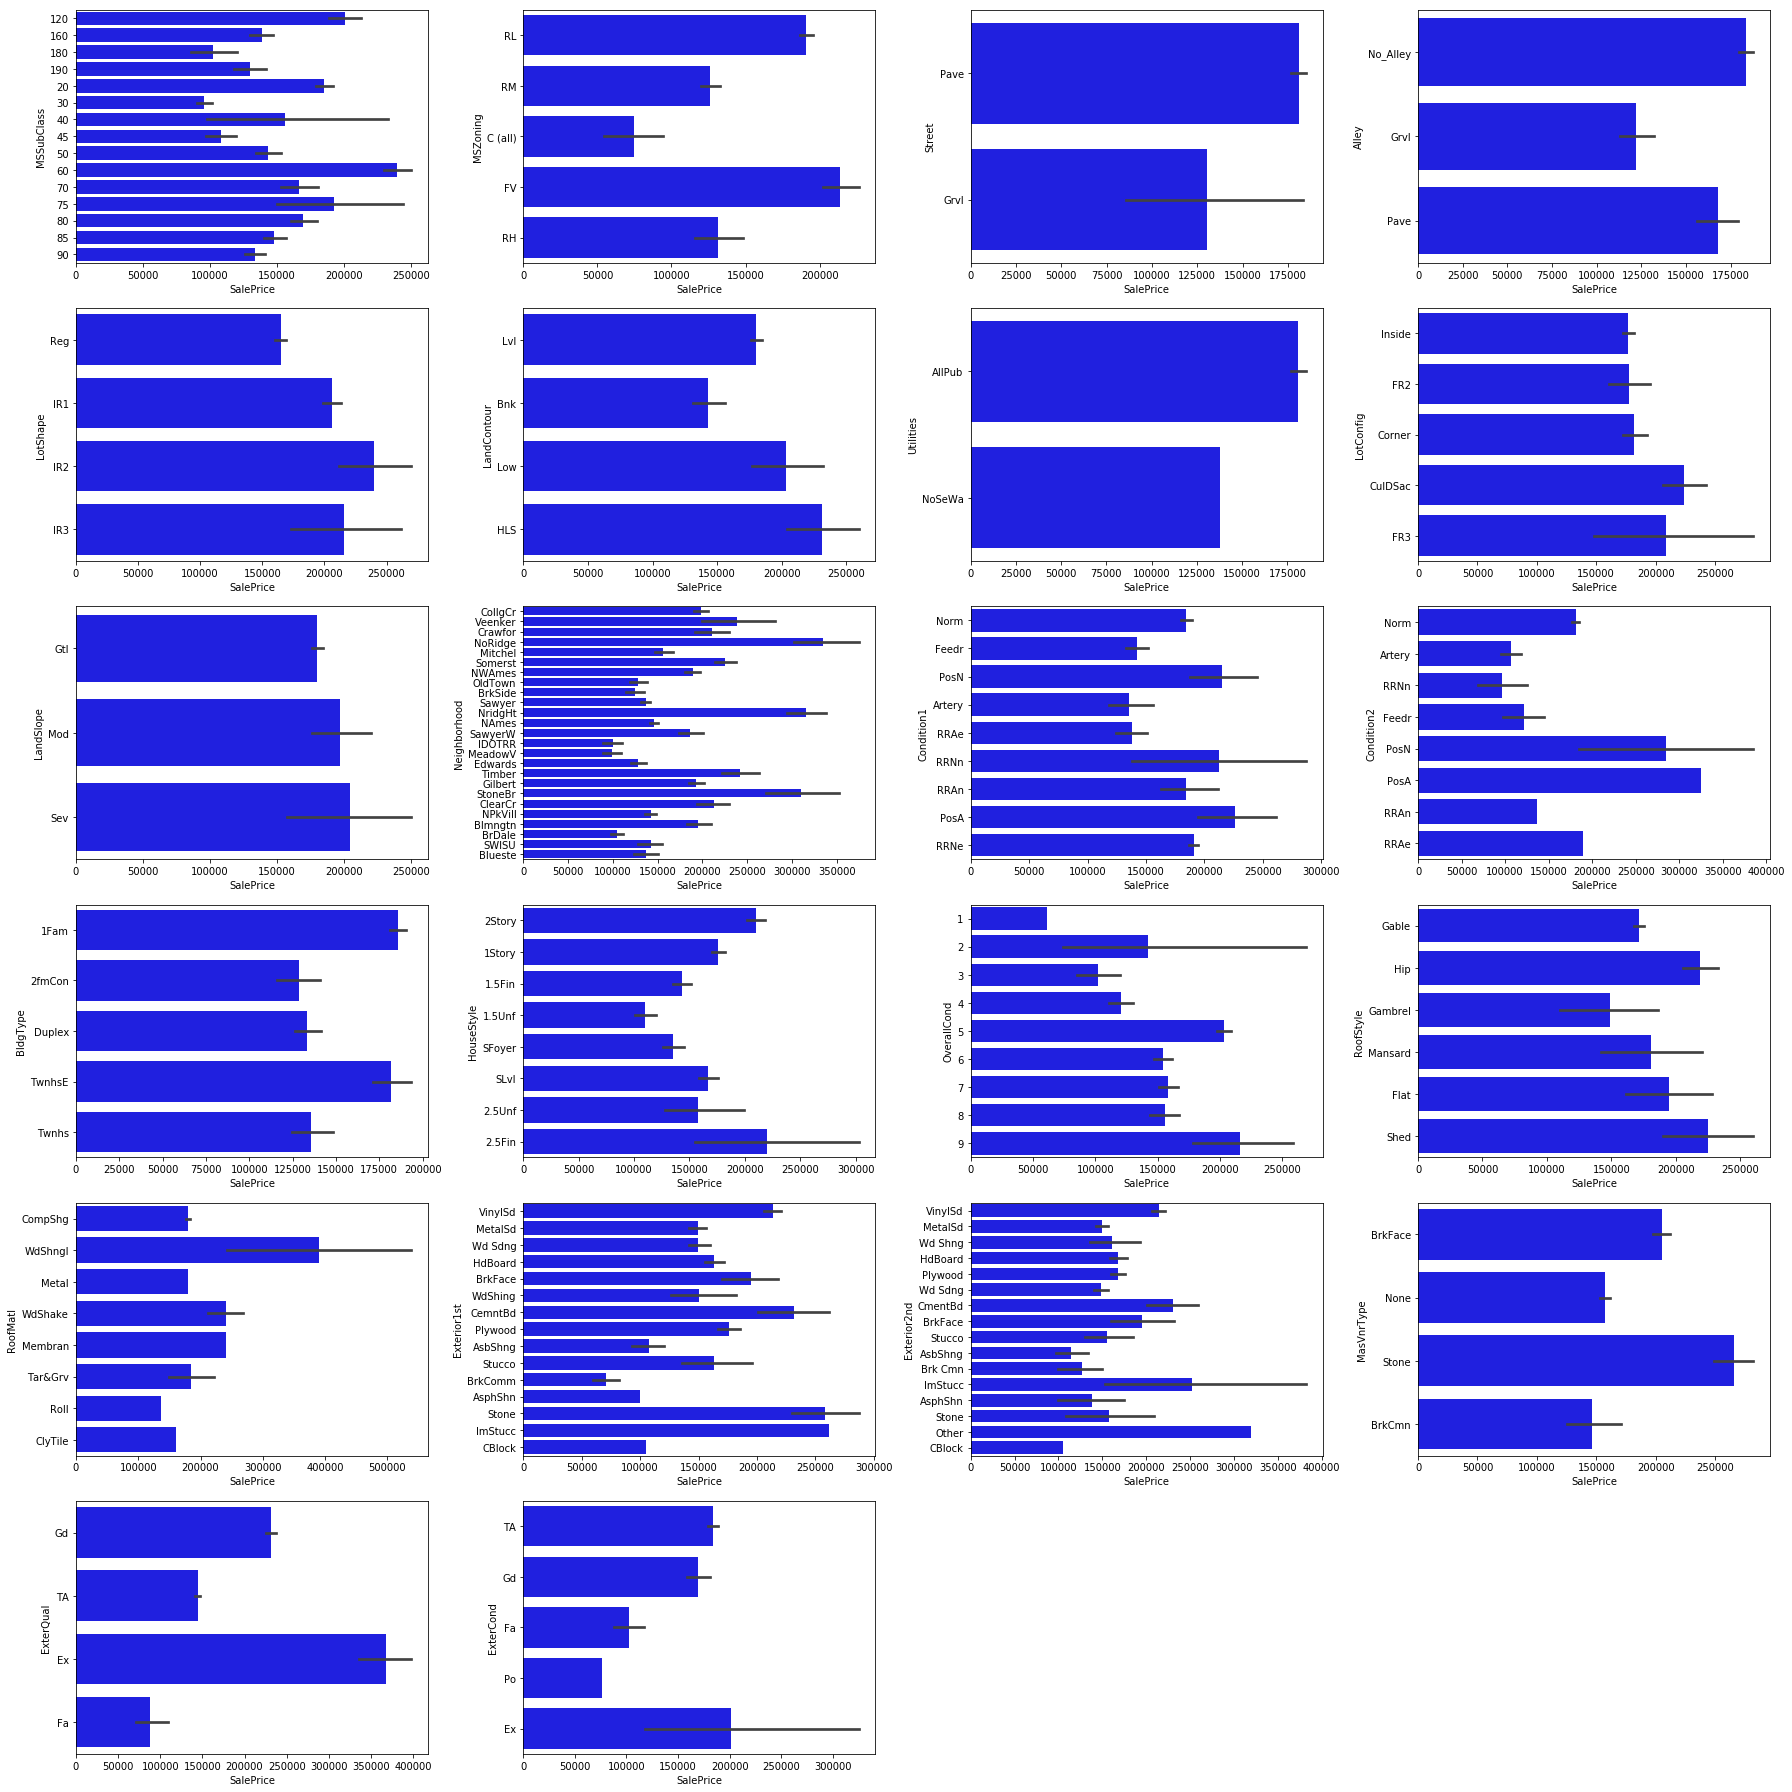

In [35]:
plots3(house_df, cat_vars = cat_variables[:22])
plt.tight_layout()

Following are the observations that we can make from the above plot:

1. The floating village(FV) reseidential zone and the Residential Low Density(RL) Zone has higher price of houses. Feature : MSZoning
2. Moderately irregular Lotshape(IR2) Lot Shape has higher Sale Price.
3. 2-STORY 1946 & NEWER (60) has a higher sale price. (MSSubClass)
4. Houses in the neighbourhood of North Ridge and Stone Brook have a higher Sale Price.
5. House Style of Two and one-half story: 2nd level finished (2.5Fin) has a higher Sale Price.
6. Stone and Imitation Stucco kind of covering on the house seems to have good sale price for the houses.
7. Excellent Exterior Quality of the house will increase the value of the house.

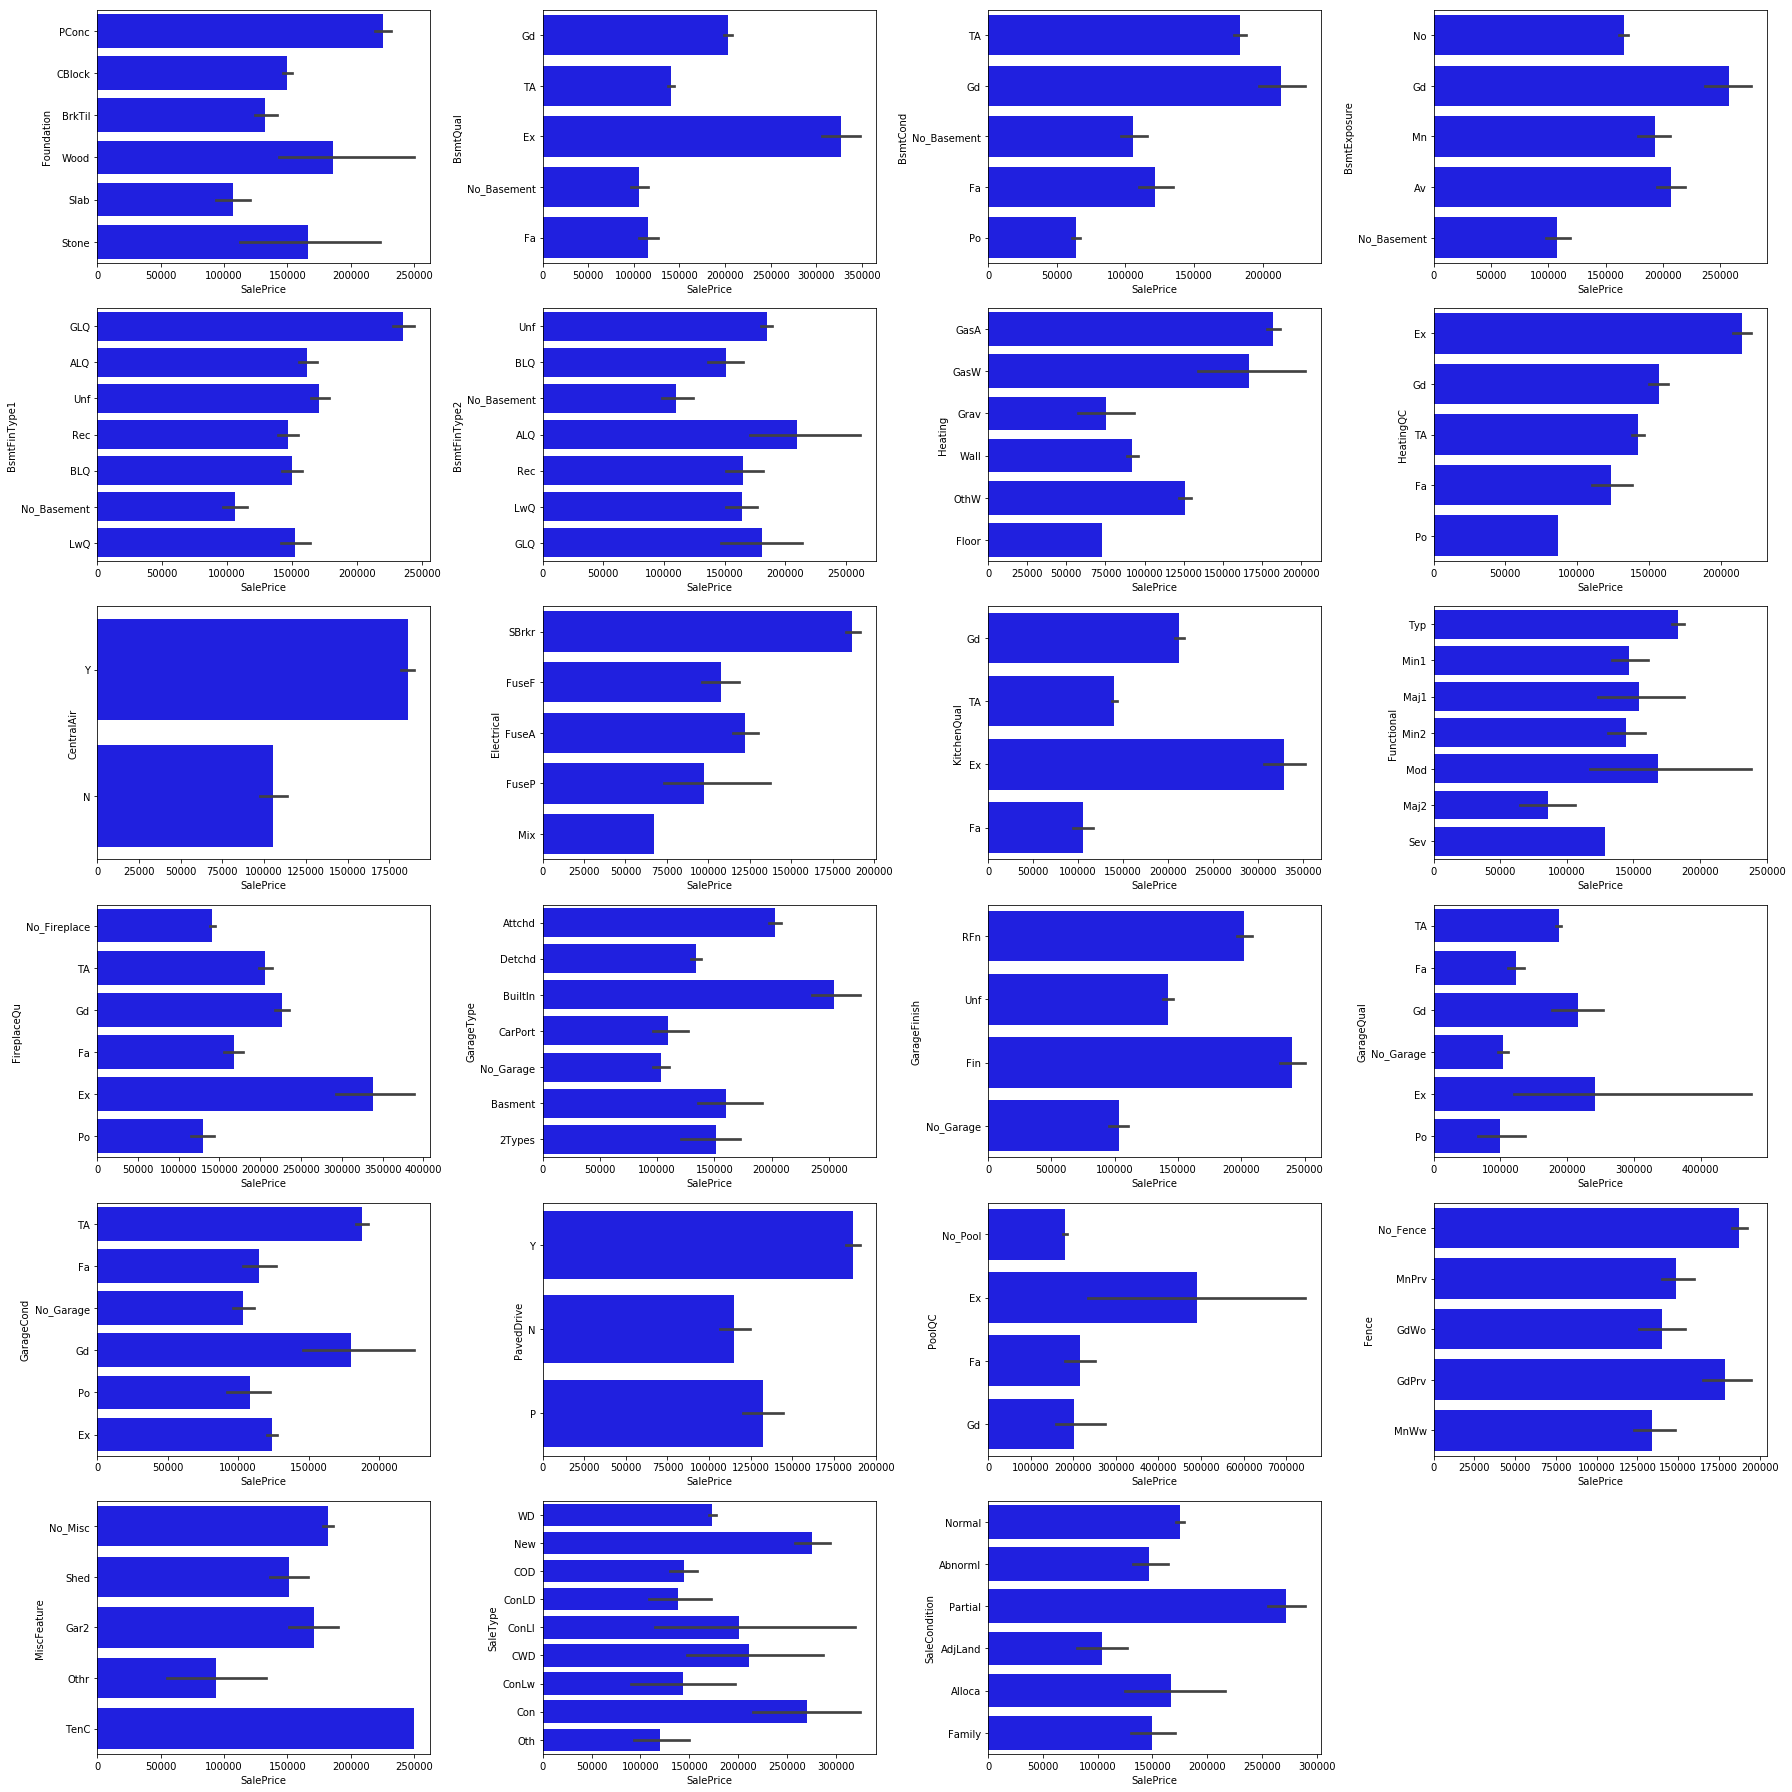

In [36]:
plots3(house_df, cat_vars = cat_variables[22:])
plt.tight_layout()

Below are the inferences from the above plots:

1. Excellent Basement Quality raises the value of the house.
2. Standard Circuit Breakers & Romex(SBrkr) in terms of Electrical System will find a good value for the house.
3. Houses with a Tennis Court(TenC) will have a higher price. Feature : MiscFeature
4. Home just constructed and sold(New) and Contract 15% Down payment regular terms(Con) will have a good sale proce for the houses.
5. Home was not completed when last assessed(Partial), houses with these conditions will help us to find a good value.

In [37]:
#lets now plot the numerical variables against the sale price
def plots4(data, num_vars):
    plt.figure(figsize=(20, 25))
    for i, nv in enumerate(num_vars):
        plt.subplot(6,4,i+1)
        sns.scatterplot(x = data[nv], y = data['SalePrice'], color = 'Green')

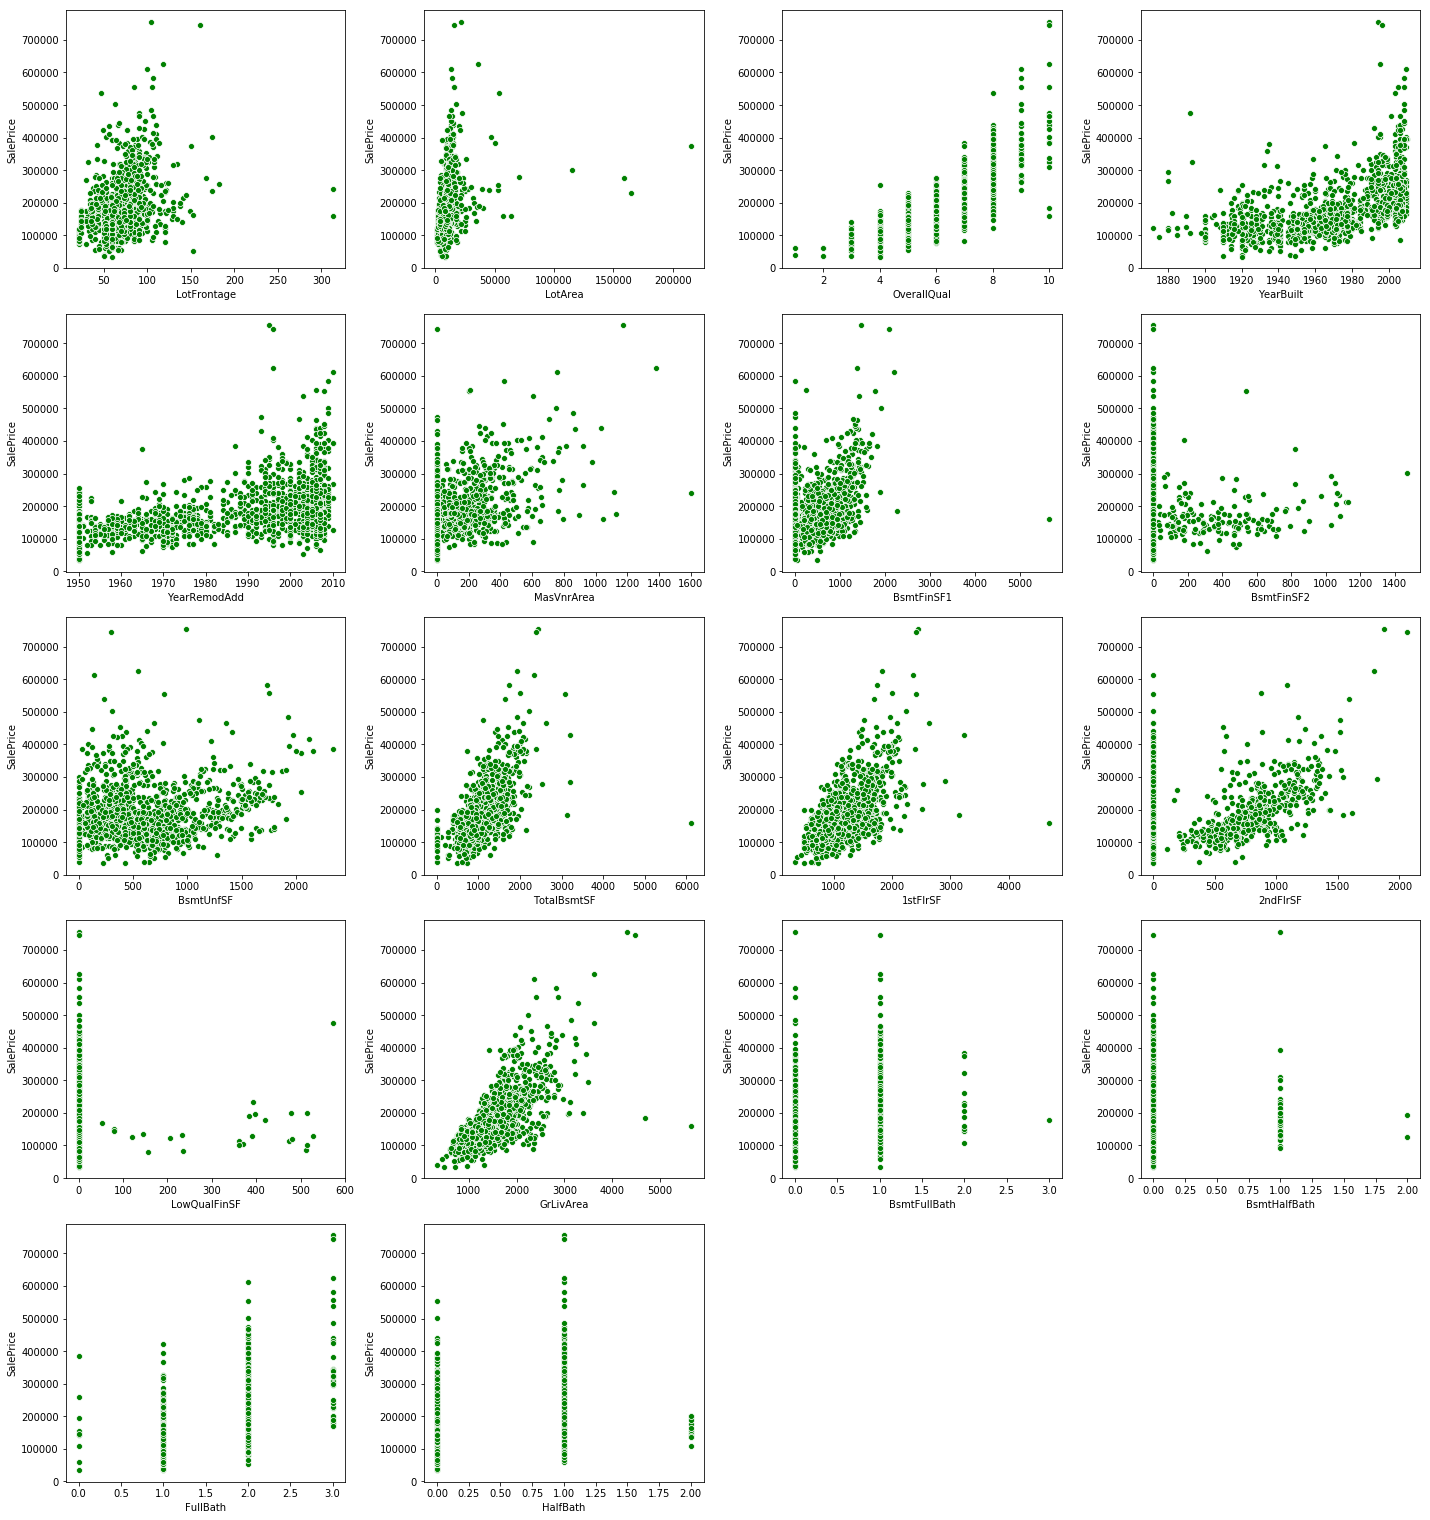

In [38]:
plots4(house_df, num_vars = num_variables[:18])
plt.tight_layout()

Following are the observations from the above plots:

1. Newer houses tend to have a higher sale price and also the ones which are recently remodelled show a higher sale price.
2. Higher Basement Area attracts Higher Prices.
3. As the square feet of first and second floor increases, the prices of the house also tend to increase
4. The square feet of above grade living area also has an influence on house prices.

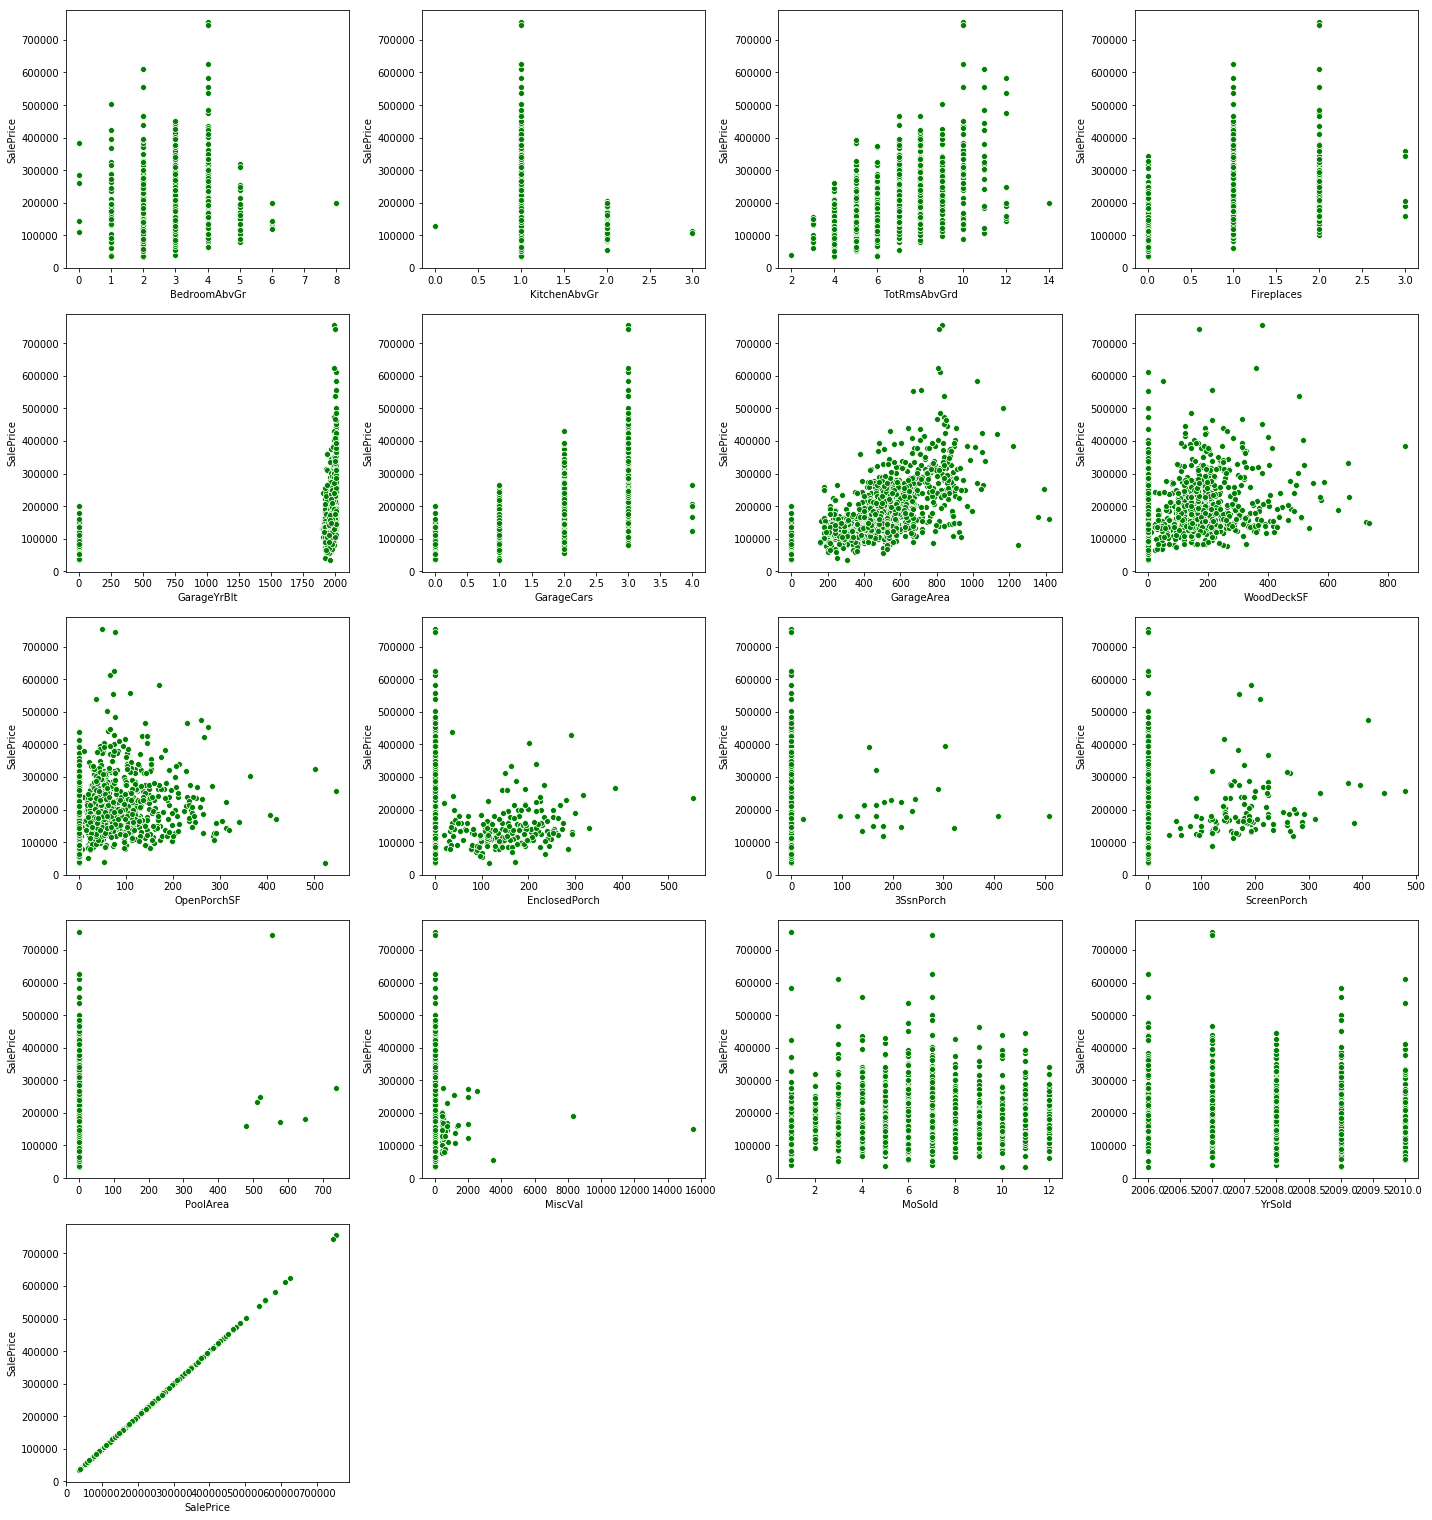

In [39]:
plots4(house_df, num_vars = num_variables[18:])
plt.tight_layout()

Following are obeservations from the above plots:

1. Garage Capacity of 3 cars will help us to get a higher value for the houses.
2. Higher Garage Area will find a Increased Value for the house price.
3. Increase in the area of wood deck, open porch and enclosed seems to have an impact on the house prices.

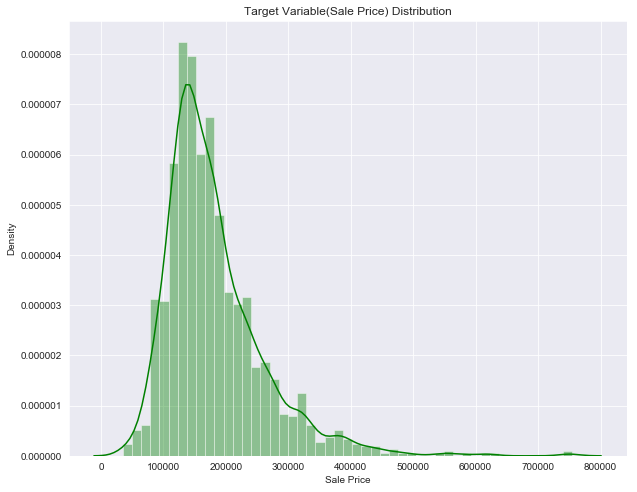

In [40]:
#lets look the target variable Sale Price again to see its distribution
plt.figure(figsize=(10,8))
sns.set_style(style = 'darkgrid')
sns.distplot(house_df['SalePrice'], color = 'Green')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.title('Target Variable(Sale Price) Distribution')
plt.show()

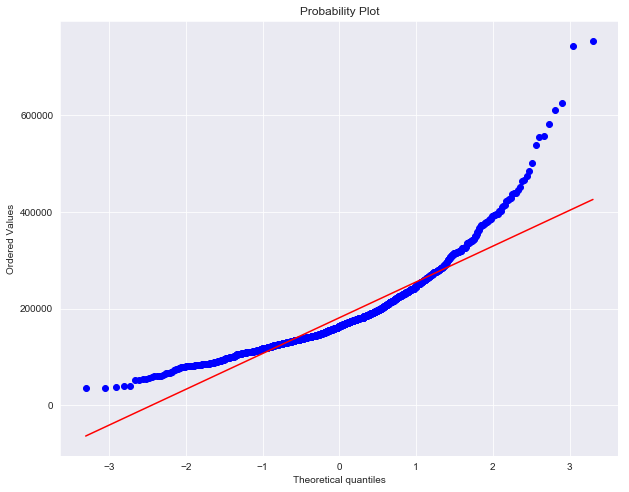

In [41]:
#Also plotting the QQ Plot
plt.figure(figsize = (10,8))
stats.probplot(house_df['SalePrice'], plot = plt)
plt.show()

From the above plot we can see that the target variable(SalePrice) is not perfectly Normal Distributed and it is little right skewed hence lets try to transform the same to make the distribution normal.

In [42]:
#lets first see the skewness of our target variable
house_df['SalePrice'].skew()

1.8828757597682129

In [43]:
#lets use a log transform to transform our target variable Sale Price
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])
house_df['SalePrice'].skew()

0.12134661989685333

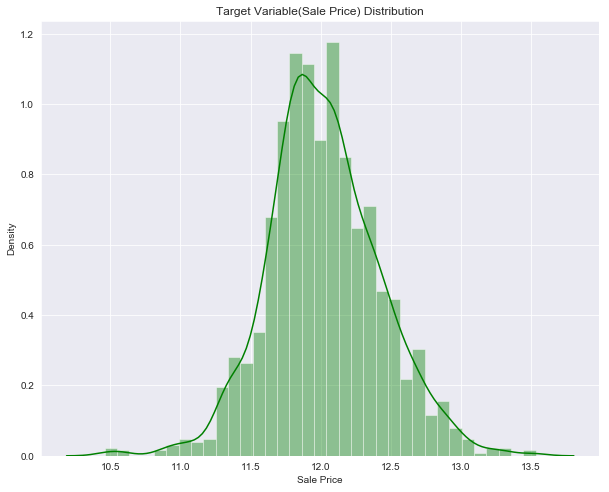

In [44]:
#lets look the target variable Sale Price again to see its distribution
plt.figure(figsize=(10,8))
sns.set_style(style = 'darkgrid')
sns.distplot(house_df['SalePrice'], color = 'Green')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.title('Target Variable(Sale Price) Distribution')
plt.show()

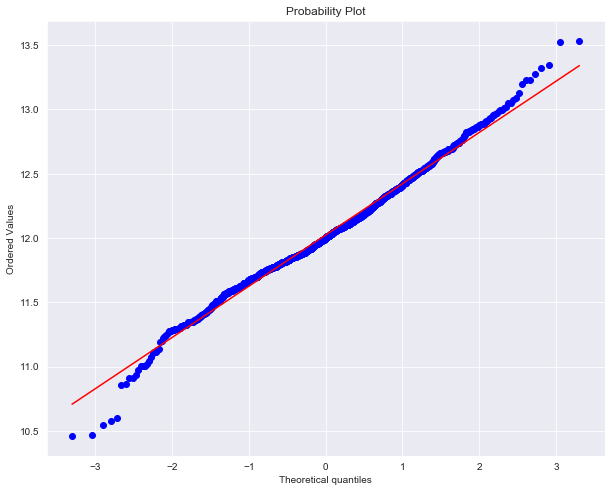

In [45]:
#Also plotting the QQ Plot
plt.figure(figsize = (10,8))
stats.probplot(house_df['SalePrice'], plot = plt)
plt.show()

The skew seems to be now corrected and data appears more in a normalized manner

In [46]:
#lets look at the skewness of our numerical variables
skewed_features = house_df[num_variables].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame({'Skew' : skewed_features})
skewness.head(15)

,Skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


In [47]:
#we will use Box Cox Transform to Transform our highly skewed features
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to perform Box Cox Transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_feature = skewness.index
lam = 0.15 #we are setting lam = 0.15 since setting it a 0 will be log1p transformation
for feat in skewed_feature:
    house_df[feat] = boxcox1p(house_df[feat], lam)

There are 35 skewed numerical features to perform Box Cox Transform


In [48]:
#lets look at the skewness of the variables again
#lets look at the skewness of our numerical variables
skewed_features = house_df[num_variables].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame({'Skew' : skewed_features})
skewness.head(15)

,Skew
PoolArea,14.363418
3SsnPorch,7.827826
LowQualFinSF,7.593301
MiscVal,5.505530
KitchenAbvGr,3.995746
BsmtHalfBath,3.943685
ScreenPorch,3.184431
BsmtFinSF2,2.619350
EnclosedPorch,2.160966
LotArea,0.751948


This distribution looks somewhat better than the original distribution, hence we willgo ahead with this distribution.

In [49]:
#we have few columns with year in our dataframe. we will convert them for our analysis
#lets use the year built and remodelled age to retreive the age of the house from the current year
import datetime
now = datetime.datetime.now()
curr_year = now.year
house_df['age_house'] = curr_year - house_df['YearBuilt']
house_df['remodelled_age'] = curr_year - house_df['YearRemodAdd']

In [50]:
#printing shape of the dataframe before we drop few features
house_df.shape

(1460, 82)

In [51]:
#Also from the above graphs we could see that the Garage Year Built, Year Sold and Month Sold do not have clear distribution.
#Also they are tend to be concentrated during one period, hence we will remove these features for our analysis
house_df.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold'], inplace = True, axis = 1)

In [52]:
#displaying the shape of the dataframe after dropping the features
house_df.shape

(1460, 77)

### Step 3 :  Data Preparation

In [53]:
#categorical data in our dataframe
categorical_data = house_df.select_dtypes(exclude = np.number)

#lets see the number of unique values in categorical variables
cat_cols = categorical_data.columns
categorical_data[cat_cols].nunique().sort_values()

CentralAir        2
Street            2
Utilities         2
PavedDrive        3
LandSlope         3
Alley             3
LandContour       4
GarageFinish      4
PoolQC            4
ExterQual         4
MasVnrType        4
LotShape          4
KitchenQual       4
BsmtCond          5
BsmtQual          5
Electrical        5
ExterCond         5
BsmtExposure      5
HeatingQC         5
BldgType          5
Fence             5
MiscFeature       5
LotConfig         5
MSZoning          5
GarageQual        6
GarageCond        6
FireplaceQu       6
Foundation        6
SaleCondition     6
RoofStyle         6
Heating           6
BsmtFinType2      7
BsmtFinType1      7
Functional        7
GarageType        7
RoofMatl          8
HouseStyle        8
Condition2        8
SaleType          9
OverallCond       9
Condition1        9
Exterior1st      15
MSSubClass       15
Exterior2nd      16
Neighborhood     25
dtype: int64

In [54]:
#The columns CentralAir, Street and Utilities have binary values in our dataframe
#displaying the unique values in these dataframe
print("Central Air : ",house_df['CentralAir'].unique())
print("Street : ",house_df['Street'].unique())
print("Utilities : ",house_df['Utilities'].unique())

Central Air :  ['Y' 'N']
Street :  ['Pave' 'Grvl']
Utilities :  ['AllPub' 'NoSeWa']


In [55]:
#Mapping the values in the above columns to 0's and 1.
house_df['CentralAir'] = house_df['CentralAir'].map({'Y' : 1, 'N' : 0})
house_df['Street'] = house_df['Street'].map({'Pave' : 1, 'Grvl' : 0})
house_df['Utilities'] = house_df['Utilities'].map({'AllPub' : 1, 'NoSeWa' : 0})

In [56]:
#printing the first 5 rows of the dataframe
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,age_house,remodelled_age
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,5.831328,19.212182,1,No_Alley,Reg,Lvl,1,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2.440268,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,8.059126,Gd,TA,PConc,Gd,TA,No,GLQ,11.170327,Unf,0.0,7.483296,11.692623,GasA,Ex,1,SBrkr,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,Gd,2.602594,Typ,0.000000,No_Fireplace,Attchd,RFn,1.194318,10.506271,TA,TA,Y,0.000000,5.714669,0.000000,0.0,0.0,0.0,No_Pool,No_Fence,No_Misc,0.0,WD,Normal,3.156009,2005.812473,2005.812473
2,20,RL,6.221214,19.712205,1,No_Alley,Reg,Lvl,1,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,2.259674,8,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,12.062832,Unf,0.0,8.897844,12.792276,GasA,Ex,1,SBrkr,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,0.730463,TA,2.259674,Typ,0.730463,TA,Attchd,RFn,1.194318,10.062098,TA,TA,Y,9.010206,0.000000,0.000000,0.0,0.0,0.0,No_Pool,No_Fence,No_Misc,0.0,WD,Normal,3.140516,2005.854862,2005.854862
3,60,RL,5.914940,20.347241,1,No_Alley,IR1,Lvl,1,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2.440268,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,7.646538,Gd,TA,PConc,Gd,TA,Mn,GLQ,10.200343,Unf,0.0,9.917060,11.892039,GasA,Ex,1,SBrkr,11.892039,11.724598,0.0,13.832085,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,Gd,2.259674,Typ,0.730463,TA,Attchd,RFn,1.194318,10.775536,TA,TA,Y,0.000000,5.053371,0.000000,0.0,0.0,0.0,No_Pool,No_Fence,No_Misc,0.0,WD,Normal,3.163719,2005.815596,2005.814034
4,70,RL,5.684507,19.691553,1,No_Alley,IR1,Lvl,1,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,2.440268,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,8.274266,Unf,0.0,10.468500,11.354094,GasA,Gd,1,SBrkr,12.013683,11.354094,0.0,13.711364,0.730463,0.000000,0.730463,0.000000,1.540963,0.730463,Gd,2.440268,Typ,0.730463,Gd,Detchd,Unf,1.540963,10.918253,TA,TA,Y,0.000000,4.745132,8.797736,0.0,0.0,0.0,No_Pool,No_Fence,No_Misc,0.0,WD,Abnorml,3.111134,2005.952471,2005.864348
5,60,RL,6.314735,21.325160,1,No_Alley,IR1,Lvl,1,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2.602594,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,9.391827,Gd,TA,PConc,Gd,TA,Av,GLQ,10.971129,Unf,0.0,10.221051,12.510588,GasA,Ex,1,SBrkr,12.510588,12.271365,0.0,14.480029,0.730463,0.000000,1.194318,0.730463,1.820334,0.730463,Gd,2.750250,Typ,0.730463,TA,Attchd,RFn,1.540963,11.627708,TA,TA,Y,8.013884,6.314735,0.000000,0.0,0.0,0.0,No_Pool,No_Fence,No_Misc,0.0,WD,Normal,3.176081,2005.817159,2005.817159


In [57]:
#before creating dummy varaibales, lets check if any numeric variables can be combined
#since area of the house is very related to determine the house prices, lets add another column to our dataframe
#the column that we are adding is total square footage which is combination of basement area, 1st floor area and 2nd floor area
house_df['TotalSF'] = house_df['TotalBsmtSF'] + house_df['1stFlrSF'] + house_df['2ndFlrSF']

In [58]:
house_df.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], inplace = True, axis = 1)

**Label Encoding of Few Categorical Variables**

In [59]:
#importing the required packages
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond')

#applying label encoder to the above columns

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(house_df[c].values))
    house_df[c] = lbl.transform(list(house_df[c].values))
    
#printing the shape of our dataframe
print('Shape of dataframe : {}'.format(house_df.shape))
    

Shape of dataframe : (1460, 75)


**Dummy Variables**

We have few categorical variables which has many levels and these needs to be converted to integers as well.
For this we will use dummy variables

In [60]:
df = pd.get_dummies(house_df)

In [61]:
#lets now check how the data looks like
df.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SalePrice,age_house,remodelled_age,TotalSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,MiscFeature_Gar2,MiscFeature_No_Misc,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,9,5.831328,19.212182,1,1,3,1,0,2.440268,4,8.059126,2,4,2,4,3,2,11.170327,6,0.0,7.483296,0,1,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,2,2.602594,6,0.000000,3,2,1.194318,10.506271,5,5,2,0.000000,5.714669,0.000000,0.0,0.0,0.0,3,4,0.0,3.156009,2005.812473,2005.812473,35.071435,0,0,0,1,0,0,0,0,1,0,0,

In [62]:
#performing an info on our new df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Columns: 217 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(30), int64(25), uint8(162)
memory usage: 909.7 KB


In [63]:
#checking the shape of our dataframe
df.shape

(1460, 217)

### Step 4 : Model Building & Evaluation

**Splitting the Data Into Training and Testing Split**

In [64]:
#importing the required package to perform train test split
from sklearn.model_selection import train_test_split

In [65]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [66]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SalePrice,age_house,remodelled_age,TotalSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,MiscFeature_Gar2,MiscFeature_No_Misc,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
211,5,5.887419,17.666301,1,1,3,1,0,2.055642,5,0.000000,3,4,4,4,3,5,10.105326,6,0.0,9.691225,4,0,0.0,11.718228,0.730463,0.0,0.730463,0.000000,1.194318,0.730463,3,2.055642,6,0.000000,3,1,0.000000,0.000000,3,3,2,0.000000,0.000000,6.574447,0.0,0.0,0.0,3,4,0.0,3.069934,2005.936290,2005.896148,23.436457,0,0,0,1,0,0,0,0,1,0,0,0,0,

**Rescaling the variables using Robust Scaler as the same is robust to outliers**

In [67]:
#importing the requried libraries
from sklearn.preprocessing import RobustScaler #we are using robust scaler since it is robust to the presence of outliers

In [68]:
scaler = RobustScaler()

In [69]:
#applying scaler to all the columns of our train split
cols = df_train.columns
cols = list(cols)
df_train[cols] = scaler.fit_transform(df_train[cols])

In [70]:
#transforming our test set using Robust Scaler
df_test[cols] = scaler.transform(df_test[cols])

In [71]:
#displaying the first 5 rows of our dataframe
df_train.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SalePrice,age_house,remodelled_age,TotalSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,MiscFeature_Gar2,MiscFeature_No_Misc,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
211,0.0,-0.151967,-1.168932,0.0,0.0,0.0,0.0,0.0,-0.530468,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.6,0.039215,0.0,0.0,-0.117330,1.0,-1.0,0.0,-1.150148,1.0,0.0,-1.0,0.0,-1.000000,0.000000,0.0,-0.530468,0.0,-1.0,0.0,-0.5,-2.574768,-7.272813,-2.0,-2.0,0.0,0.000000,-0.703883,6.574447,0.0,0.0,0.0,0.0,0.0,0.0,-0.994444,1.056205,1.19611

In [72]:
#lets do a describe on df_train
df_train.describe()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SalePrice,age_house,remodelled_age,TotalSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,MiscFeature_Gar2,MiscFeature_No_Misc,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000

**Dividing into X and Y sets for Model Building**

In [73]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [74]:
#printing the shape of X_train and y_train
print(X_train.shape)
print(y_train.shape)

(1021, 216)
(1021,)


In [75]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [76]:
#printing the shape of X_test and y_test
print(X_test.shape)
print(y_test.shape)

(438, 216)
(438,)


In [77]:
#importing Lasso and Ridge and other required libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [78]:
folds = 5
params = {'alpha': [0.0001, 0.001, 0.01,0.02, 0.03, 0.04, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [79]:
#performing grid search on the lasso model to find the optimal number of features
lasso = Lasso()

In [80]:
#performing GridSearchCV()
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)

In [81]:
#fitting the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    4.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                                   10.0, 20, 50, 100, 500, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [82]:
#cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.108093,0.042546,0.003020,0.002152,0.0001,{'alpha': 0.0001},-0.182467,-0.180721,-0.181691,-0.160704,-0.160158,-0.173157,0.010399,2,-0.123824,-0.123077,-0.121208,-0.127208,-0.125364,-0.124136,0.002037
1,0.051851,0.013839,0.003510,0.001259,0.001,{'alpha': 0.001},-0.164573,-0.181419,-0.173403,-0.143588,-0.153322,-0.163262,0.013559,1,-0.138102,-0.134986,-0.135515,-0.140770,-0.141777,-0.138230,0.002718
2,0.019732,0.002899,0.004570,0.000601,0.01,{'alpha': 0.01},-0.172720,-0.188055,-0.198702,-0.172899,-0.185834,-0.183631,0.009858,3,-0.179483,-0.173059,-0.171591,-0.178523,-0.175542,-0.175639,0.003038
3,0.018400,0.002331,0.003641,0.001708,0.02,{'alpha': 0.02},-0.176929,-0.202397,-0.209109,-0.187688,-0.196957,-0.194599,0.011294,4,-0.191731,-0.185408,-0.183815,-0.190943,-0.189459,-0.188271,0.003117
4,0.020071,0.002791,0.001863,0.001844,0.03,{'alpha': 0.03},-0.186205,-0.214190,-0.216914,-0.202909,-0.205135,-0.205052,0.010818,5,-0.204675,-0.194909,-0.194643,-0.203632,-0.201497,-0.199871,0.004285
5,0.020189,0.002104,0.001759,0.001534,0.04,{'alpha': 0.04},-0.198908,-0.225887,-0.227209,-0.219015,-0.215087,-0.217203,0.010190,6,-0.218027,-0.206405,-0.207600,-0.216581,-0.214592,-0.212641,0.004746
6,0.019135,0.000876,0.002720,0.000842,0.05,{'alpha': 0.05},-0.213300,-0.239548,-0.238896,-0.236100,-0.230289,-0.231609,0.009741,7,-0.232890,-0.221004,-0.222724,-0.231224,-0.229873,-0.227543,0.004766
7,0.014766,0.001581,0.002610,0.001811,0.1,{'alpha': 0.1},-0.258856,-0.289300,-0.278800,-0.277743,-0.272475,-0.275419,0.009933,8,-0.276559,-0.268057,-0.270645,-0.273604,-0.277561,-0.273285,0.003561
8,0.016115,0.002286,0.002401,0.001075,0.2,{'alpha': 0.2},-0.357009,-0.384135,-0.375353,-0.354479,-0.379547,-0.370092,0.012078,9,-0.366833,-0.364032,-0.368727,-0.361911,-0.373654,-0.367031,0.004050
9,0.016428,0.000881,0.002599,0.001722,0.3,{'alpha': 0.3},-0.461898,-0.484075,-0.473601,-0.439741,-0.491763,-0.470207,0.018245,10,-0.464148,-0.465288,-0.473438,-0.461279,-0.472585,-0.467348,0.004813


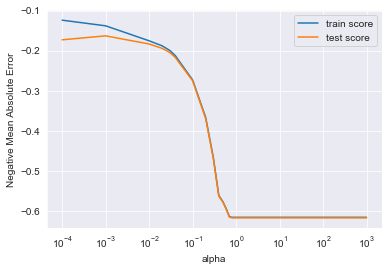

In [83]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [84]:
#lets look at the optimal value of alpha
alpha_lasso_orig = model_cv.best_params_
print("The optimal value of alpha for Lasso Regression is : ", alpha_lasso_orig)

The optimal value of alpha for Lasso Regression is :  {'alpha': 0.001}


In [85]:
#lets build the Lasso model with this optimum alpha
lasso_orig = Lasso(alpha = 0.001, random_state = 100)
lasso_orig.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=100,
      selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
#predictions on the train and test sets
y_train_pred_orig = lasso_orig.predict(X_train)
r2_train_orig = metrics.r2_score(y_true=y_train, y_pred=y_train_pred_orig)
print(r2_train_orig)

0.9365077663950884


In [87]:
y_test_pred_orig = lasso_orig.predict(X_test)
r2_test_orig = metrics.r2_score(y_true=y_test, y_pred=y_test_pred_orig)
print(r2_test_orig)

0.8782153851700663


In [88]:
from sklearn.metrics import mean_squared_error
#Returns the mean squared error; we'll take a square root
rmse_lasso_orig = np.sqrt(mean_squared_error(y_test, y_test_pred_orig))
print(rmse_lasso_orig)

0.28198722147590816


In [89]:
# lasso model parameters
model_parameters = list(lasso_orig.coef_)
model_parameters.insert(0, lasso_orig.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list_parameters_lasso = list(zip(cols, model_parameters))

In [90]:
#creating a data frame with our model parameters and their coefficients
lassodf_orig = pd.DataFrame(list_parameters_lasso, columns = ['Feature', 'Ranking'])

In [91]:
lassodf_orig.head()

,Feature,Ranking
0,constant,0.097
1,MSSubClass,-0.000
2,LotFrontage,-0.000
3,LotArea,0.069
4,Street,0.000


In [92]:
#ranking the model parameters in descending values of their coefficients
lassodf_orig = lassodf_orig.sort_values('Ranking', ascending=False)

In [93]:
lassodf_orig['Ranking'].value_counts().sort_values(ascending = False)

-0.000    122
-0.012      3
 0.003      3
 0.006      3
-0.013      2
-0.006      2
 0.080      2
 0.008      2
 0.005      2
-0.021      2
 0.138      2
 0.044      2
-0.022      2
 0.004      2
 0.001      2
 0.025      2
 0.037      2
-0.005      2
-0.067      1
-0.602      1
 0.085      1
 0.069      1
 0.045      1
-0.054      1
 0.445      1
-0.029      1
 0.105      1
-0.035      1
 0.049      1
-0.020      1
-0.033      1
-0.166      1
-0.001      1
-0.062      1
 0.203      1
 0.012      1
-0.007      1
-0.132      1
 0.079      1
-0.079      1
 0.078      1
-0.061      1
-0.604      1
-0.069      1
-0.023      1
-1.068      1
-0.185      1
 0.047      1
 0.021      1
 0.015      1
-0.729      1
-0.047      1
 0.019      1
 0.160      1
 0.067      1
-0.042      1
 0.039      1
-0.032      1
-0.107      1
 0.101      1
-0.115      1
 0.070      1
 0.009      1
 0.144      1
-0.051      1
 0.033      1
-0.003      1
 0.177      1
 0.139      1
 0.153      1
-0.111      1
-0.058

We can see from the above that 122 parameters have coefficents of zero, this means they are eliminated.

In [94]:
#displaying the top 20 predictors in our model
lassodf_orig = lassodf_orig.head(20)

In [95]:
lassodf_orig

,Feature,Ranking
25,GrLivArea,0.445
75,Neighborhood_Crawfor,0.203
9,OverallQual,0.177
85,Neighborhood_NridgHt,0.160
91,Neighborhood_StoneBr,0.153
90,Neighborhood_Somerst,0.144
141,Exterior1st_BrkFace,0.139
84,Neighborhood_NoRidge,0.138
18,BsmtFinSF1,0.138
38,GarageCars,0.105


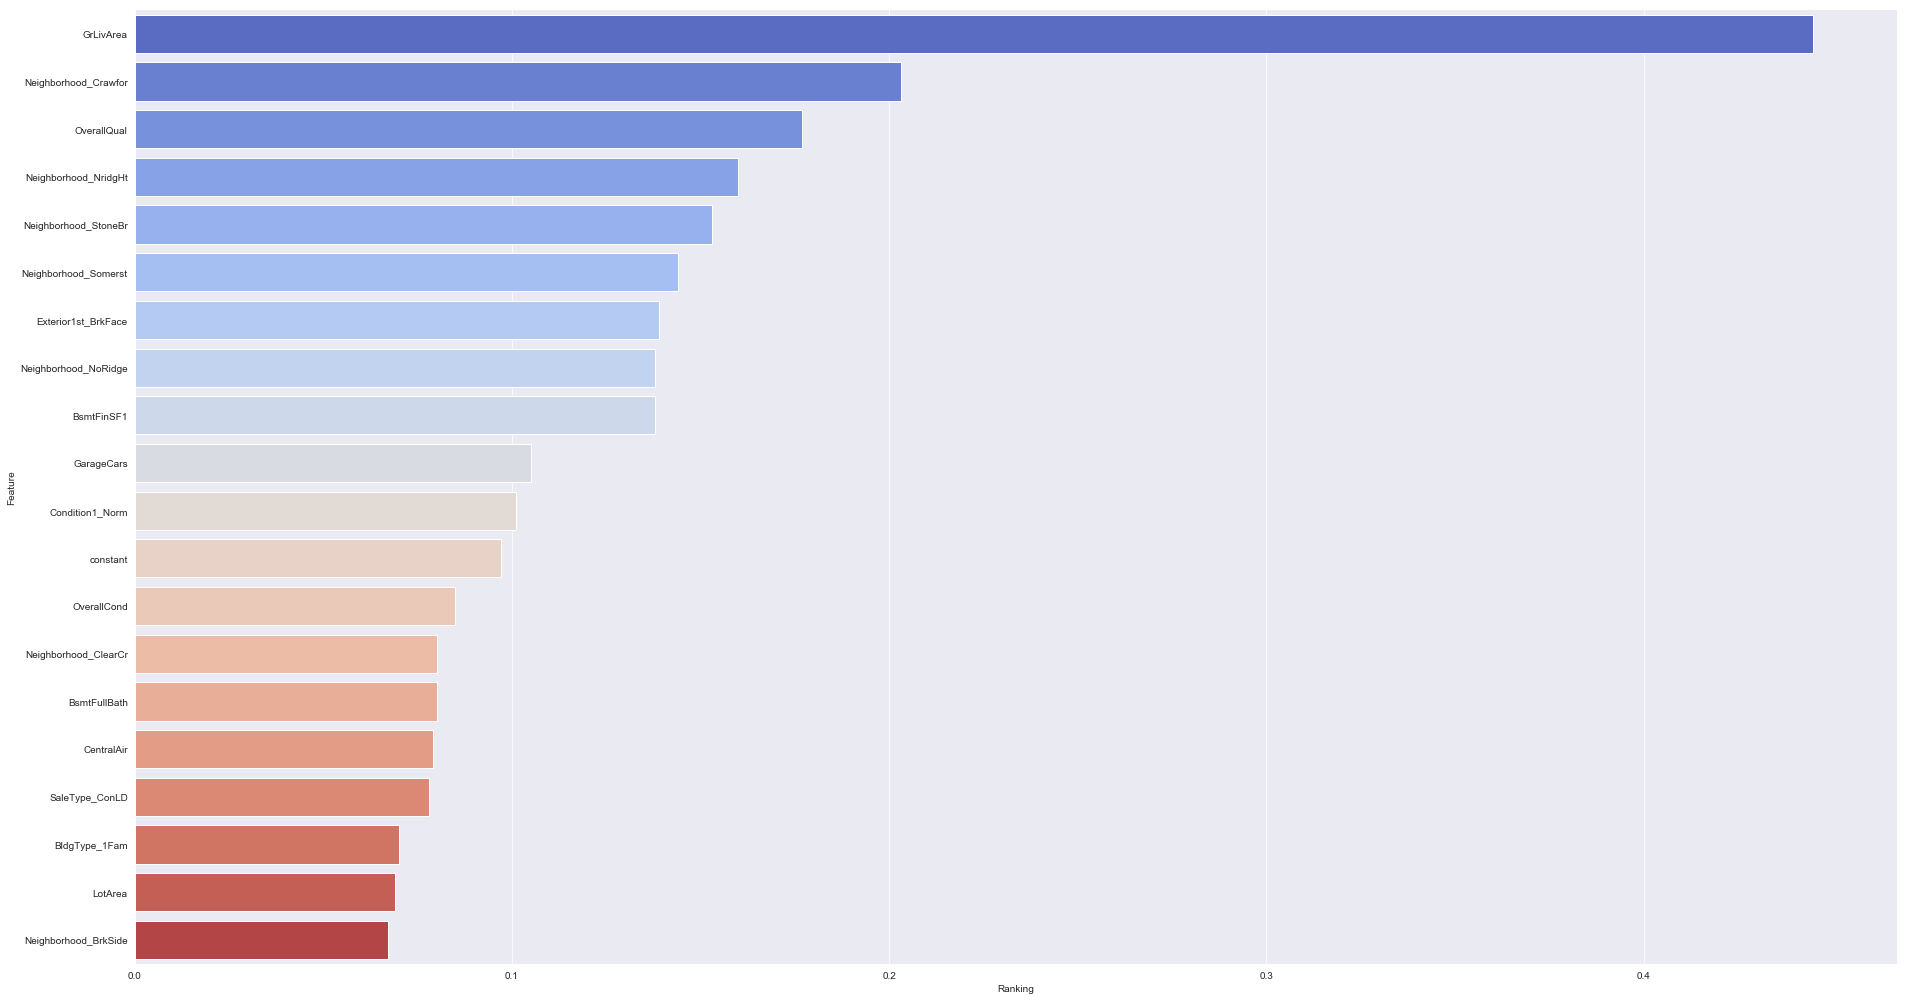

In [96]:
#plotting a graph of the top 20 features with their impacts
sns.factorplot(x="Ranking", y="Feature", data = lassodf_orig, kind="bar", 
               size=14, aspect=1.9, palette='coolwarm')
plt.show()

We can see from the above table and graph, following are the top 5 features for Lasso Regression:
1. GrLivArea
2. Neighborhood_Crawfor
3. OverallQual
4. Neighborhood_NridgHt
5. Neighborhood_StoneBr

**Ridge**

In [97]:
folds = 5
alpha = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [98]:
ridge = Ridge()

In [99]:
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = alpha, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)

In [100]:
#fitting the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [101]:
#cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013722,0.001766,0.002572,0.001903,0.0001,{'alpha': 0.0001},-0.224681,-0.186962,-0.192457,-0.169449,-0.171840,-0.189113,0.019850,26,-0.120775,-0.121701,-0.119108,-0.124674,-0.122499,-0.121751,0.001846
1,0.015109,0.001686,0.003317,0.001813,0.001,{'alpha': 0.001},-0.187312,-0.186929,-0.192431,-0.169398,-0.171798,-0.181579,0.009198,24,-0.121249,-0.121705,-0.119107,-0.124681,-0.122506,-0.121850,0.001808
2,0.012179,0.002530,0.002035,0.001957,0.01,{'alpha': 0.01},-0.184393,-0.186620,-0.192185,-0.168905,-0.171389,-0.180702,0.009012,23,-0.121504,-0.121743,-0.119173,-0.124821,-0.122645,-0.121978,0.001826
3,0.012922,0.003639,0.001028,0.000928,0.05,{'alpha': 0.05},-0.184852,-0.185483,-0.191195,-0.167043,-0.169903,-0.179700,0.009466,22,-0.121826,-0.121908,-0.119522,-0.125475,-0.123300,-0.122406,0.001956
4,0.012473,0.002314,0.003135,0.001583,0.1,{'alpha': 0.1},-0.183839,-0.184381,-0.190130,-0.165189,-0.168358,-0.178385,0.009778,21,-0.122200,-0.122141,-0.119907,-0.126214,-0.124046,-0.122902,0.002113
5,0.014111,0.003239,0.002774,0.001524,0.2,{'alpha': 0.2},-0.181928,-0.183366,-0.188319,-0.162299,-0.166697,-0.176527,0.010136,20,-0.122882,-0.122563,-0.120600,-0.127489,-0.125376,-0.123782,0.002396
6,0.014088,0.000744,0.003114,0.001895,0.3,{'alpha': 0.3},-0.180477,-0.182641,-0.186922,-0.160082,-0.165664,-0.175162,0.010390,19,-0.123511,-0.122950,-0.121193,-0.128486,-0.126504,-0.124529,0.002616
7,0.013835,0.003259,0.004573,0.001338,0.4,{'alpha': 0.4},-0.179414,-0.182195,-0.185757,-0.158269,-0.164902,-0.174113,0.010625,17,-0.124171,-0.123331,-0.121688,-0.129347,-0.127483,-0.125204,0.002804
8,0.015241,0.001188,0.003135,0.001072,0.5,{'alpha': 0.5},-0.178493,-0.181896,-0.184735,-0.156720,-0.164326,-0.173239,0.010831,16,-0.124773,-0.123702,-0.122131,-0.130100,-0.128339,-0.125809,0.002962
9,0.014572,0.001900,0.001927,0.001486,0.6,{'alpha': 0.6},-0.177677,-0.181709,-0.183884,-0.155402,-0.163887,-0.172517,0.011020,15,-0.125367,-0.124053,-0.122519,-0.130787,-0.129101,-0.126365,0.003104


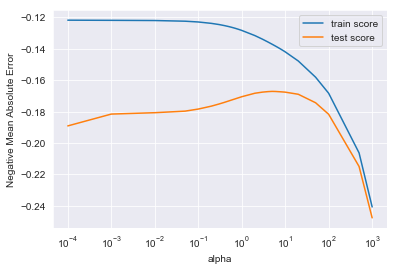

In [102]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [103]:
#lets look at the optimal value of alpha
alpha_ridge_orig = model_cv.best_params_
print(alpha_ridge_orig)

{'alpha': 5.0}


In [104]:
#lets build the Lasso model with this optimum alpha
ridge_orig = Ridge(alpha = 5, random_state = 100)
ridge_orig.fit(X_train, y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=100, solver='auto', tol=0.001)

In [105]:
#predictions on the train and test sets
y_train_pred_ridge = ridge_orig.predict(X_train)
r2_train_ridge = metrics.r2_score(y_true=y_train, y_pred=y_train_pred_ridge)
print(r2_train_ridge)

0.9356755372667026


In [106]:
y_test_pred_ridge = ridge_orig.predict(X_test)
r2_test_ridge = metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge)
print(r2_test_ridge)

0.8885884573971399


In [107]:
from sklearn.metrics import mean_squared_error
#Returns the mean squared error; we'll take a square root
rmse_ridge_orig = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
print(rmse_ridge_orig)

0.2697107822259833


In [108]:
# ridge model parameters
model_parameters = list(ridge_orig.coef_)
model_parameters.insert(0, ridge_orig.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list_parameters = list(zip(cols, model_parameters))

In [109]:
#creating a dataframe of model parameters and their coefficients
ridgedf_orig = pd.DataFrame(list_parameters, columns = ['Feature', 'Ranking'])

In [110]:
ridgedf_orig.head()

,Feature,Ranking
0,constant,0.116
1,MSSubClass,0.001
2,LotFrontage,-0.000
3,LotArea,0.062
4,Street,0.066


In [111]:
#sorting the parameters in descending order based on their coefficeint values
ridgedf_orig = ridgedf_orig.sort_values('Ranking', ascending=False)

In [112]:
#displaying the top 20 model parameters
ridgedf_orig = ridgedf_orig.head(20)

In [113]:
ridgedf_orig

,Feature,Ranking
25,GrLivArea,0.394
75,Neighborhood_Crawfor,0.177
137,RoofMatl_WdShngl,0.172
9,OverallQual,0.169
85,Neighborhood_NridgHt,0.162
91,Neighborhood_StoneBr,0.160
205,SaleType_ConLD,0.153
141,Exterior1st_BrkFace,0.135
84,Neighborhood_NoRidge,0.133
90,Neighborhood_Somerst,0.131


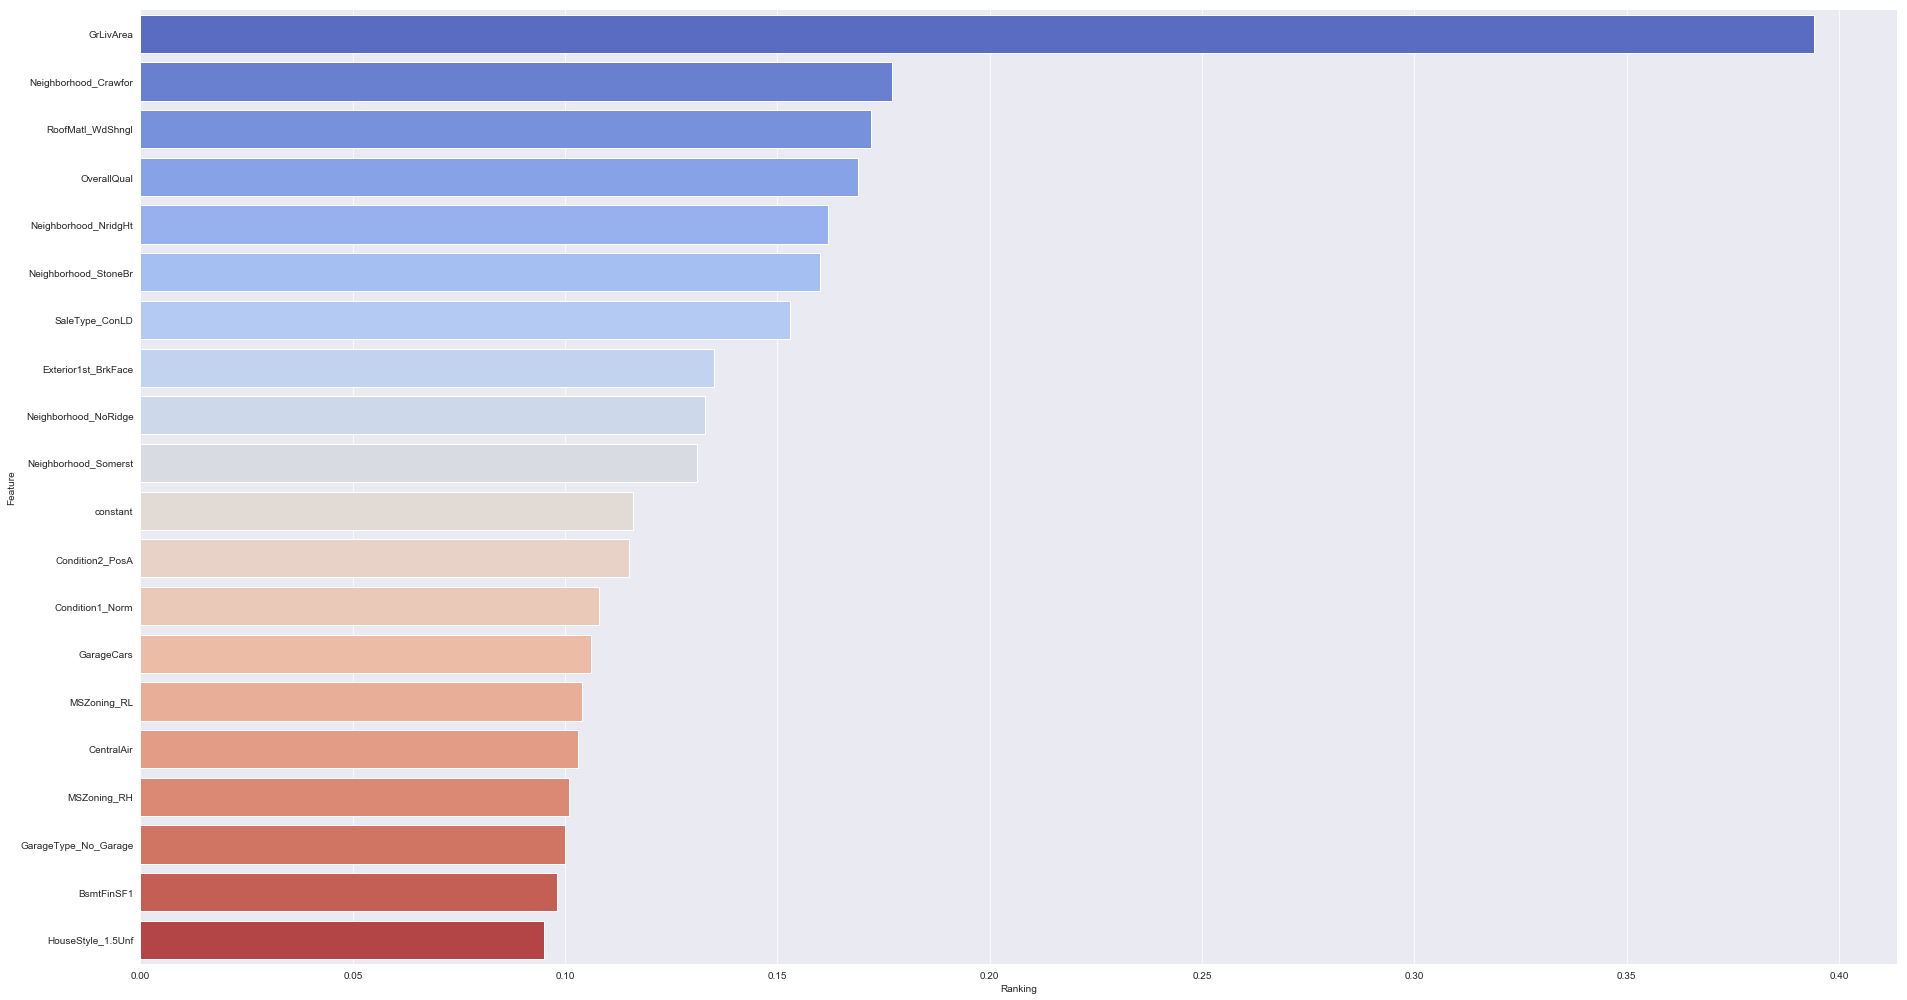

In [114]:
#visualizing the top 20 model parameters
sns.factorplot(x="Ranking", y="Feature", data = ridgedf_orig, kind="bar", 
               size=14, aspect=1.9, palette='coolwarm')
plt.show()

Following are the top 5 predictors for Ridge Regression:
1. GrLivArea
2. Neighborhood_Crawfor
3. RoofMatl_WdShngl
4. OverallQual
5. Neighborhood_NridgHt

**Coding for Question 1 in Subjective Questions**

In [115]:
#Lasso Regression by doubling the optimal alpha
lasso_q1 = Lasso(alpha = 0.001 * 2, random_state = 100)
lasso_q1.fit(X_train, y_train)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=100,
      selection='cyclic', tol=0.0001, warm_start=False)

In [116]:
#predictions on the train and test sets
y_train_pred_q1 = lasso_q1.predict(X_train)
r2_lasso_train_q1 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred_q1)
print(r2_lasso_train_q1)

0.9217100213818047


In [117]:
y_test_pred_q1 = lasso_q1.predict(X_test)
r2_lasso_test_q1 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred_q1)
print(r2_lasso_test_q1)

0.884241146349827


In [118]:
#Returns the mean squared error; we'll take a square root
rmse_lasso_q1 = np.sqrt(mean_squared_error(y_test, y_test_pred_q1))
print(rmse_lasso_q1)

0.2749225246944462


In [119]:
# lasso model parameters
model_parameters = list(lasso_q1.coef_)
model_parameters.insert(0, lasso_q1.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list_parameters_lasso = list(zip(cols, model_parameters))

In [120]:
lassodf_q1 = pd.DataFrame(list_parameters_lasso, columns = ['Feature', 'Ranking'])

In [121]:
lassodf_q1.head()

,Feature,Ranking
0,constant,0.114
1,MSSubClass,-0.007
2,LotFrontage,-0.000
3,LotArea,0.065
4,Street,0.000


In [122]:
lassodf_q1 = lassodf_q1.sort_values('Ranking', ascending=False)

In [123]:
lassodf_q1['Ranking'].value_counts().sort_values(ascending = False)

-0.000    136
 0.007      3
-0.007      3
 0.001      3
-0.014      2
-0.444      2
-0.005      2
 0.005      2
 0.002      2
-0.002      2
 0.003      2
-0.011      2
 0.034      2
 0.058      1
 0.011      1
 0.072      1
-0.013      1
 0.004      1
 0.024      1
 0.114      1
 0.006      1
 0.065      1
-0.137      1
 0.055      1
 0.200      1
-0.068      1
 0.020      1
 0.037      1
 0.098      1
 0.012      1
-0.091      1
 0.045      1
-0.070      1
-0.052      1
 0.010      1
-0.008      1
 0.429      1
-0.169      1
-0.050      1
 0.121      1
 0.120      1
-0.032      1
 0.021      1
-0.001      1
-0.122      1
 0.136      1
 0.041      1
 0.079      1
 0.133      1
-0.061      1
-0.042      1
-0.022      1
-0.039      1
 0.083      1
-0.037      1
 0.008      1
 0.019      1
 0.068      1
-0.006      1
 0.026      1
 0.139      1
-0.012      1
 0.025      1
 0.092      1
 0.164      1
-0.082      1
 0.027      1
Name: Ranking, dtype: int64

In [124]:
lassodf_q1 = lassodf_q1.head(20)

In [125]:
lassodf_q1

,Feature,Ranking
25,GrLivArea,0.429
9,OverallQual,0.200
75,Neighborhood_Crawfor,0.164
85,Neighborhood_NridgHt,0.139
90,Neighborhood_Somerst,0.136
18,BsmtFinSF1,0.133
84,Neighborhood_NoRidge,0.121
96,Condition1_Norm,0.120
0,constant,0.114
38,GarageCars,0.098


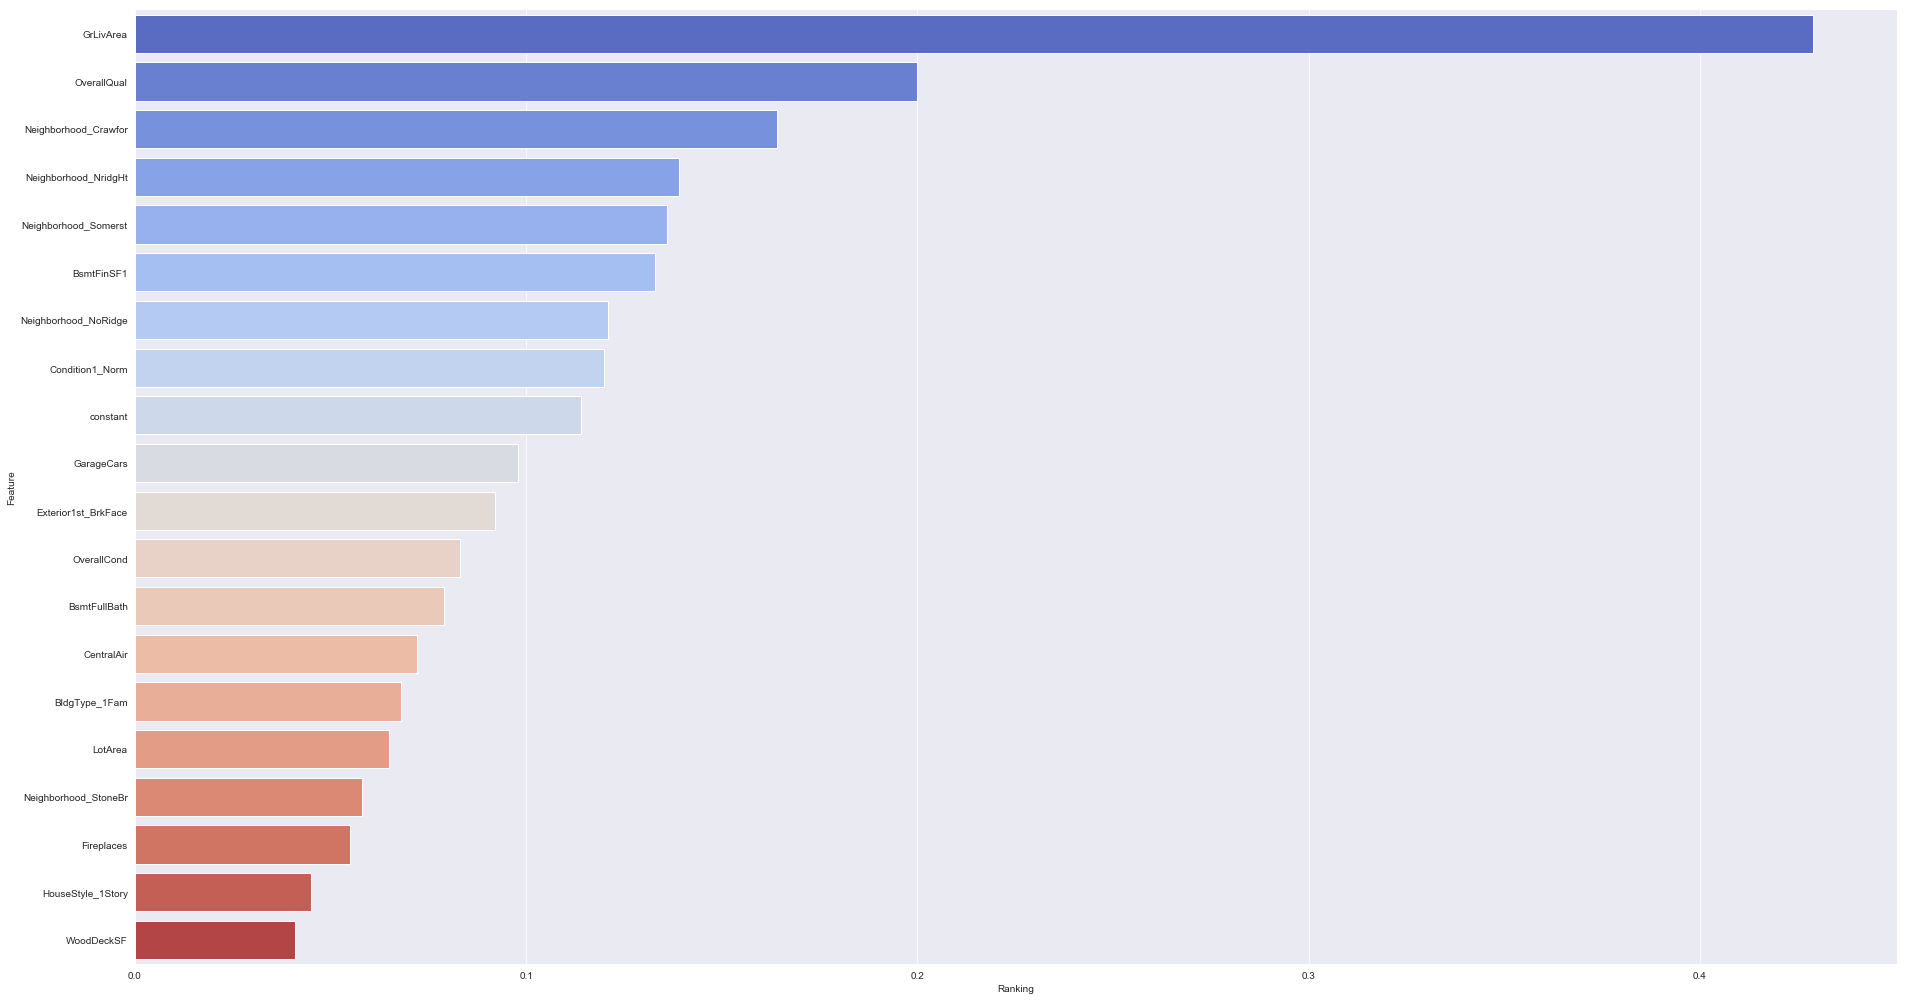

In [126]:
sns.factorplot(x="Ranking", y="Feature", data = lassodf_q1, kind="bar", 
               size=14, aspect=1.9, palette='coolwarm')
plt.show()

The top 5 important predictors after the doubling the value of alpha for Lasso are:
1. GrLivArea
2. OverallQual
3. Neighborhood_Crawfor
4. Neighborhood_NridgHt
5. Neighborhood_Somerst

In [127]:
#Ridge Regression by doubling the optimal alpha
ridge_q1 = Ridge(alpha = 5*2, random_state = 100)
ridge_q1.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=100, solver='auto', tol=0.001)

In [128]:
#predictions on the train and test sets
y_train_pred_ridge_q1 = ridge_q1.predict(X_train)
r2_ridge_train_q1 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred_ridge_q1)
print(r2_ridge_train_q1)

0.9301514629526173


In [129]:
y_test_pred_ridge_q1 = ridge_q1.predict(X_test)
r2_ridge_test_q1 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge_q1)
print(r2_ridge_test_q1)

0.8908440998225872


In [130]:
#Returns the mean squared error; we'll take a square root
rmse_ridge_q1 = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge_q1))
print(rmse_ridge_q1)

0.2669665336654507


In [131]:
# ridge model parameters
model_parameters = list(ridge_q1.coef_)
model_parameters.insert(0, ridge_q1.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list_parameters = list(zip(cols, model_parameters))

In [132]:
ridgedf_q1 = pd.DataFrame(list_parameters, columns = ['Feature', 'Ranking'])

In [133]:
ridgedf_q1.head()

,Feature,Ranking
0,constant,0.123
1,MSSubClass,0.002
2,LotFrontage,0.001
3,LotArea,0.063
4,Street,0.047


In [134]:
ridgedf_q1 = ridgedf_q1.sort_values('Ranking', ascending=False)

In [135]:
ridgedf_q1 = ridgedf_q1.head(20)

In [136]:
ridgedf_q1

,Feature,Ranking
25,GrLivArea,0.373
9,OverallQual,0.183
75,Neighborhood_Crawfor,0.154
85,Neighborhood_NridgHt,0.138
0,constant,0.123
84,Neighborhood_NoRidge,0.123
91,Neighborhood_StoneBr,0.119
90,Neighborhood_Somerst,0.115
141,Exterior1st_BrkFace,0.110
38,GarageCars,0.109


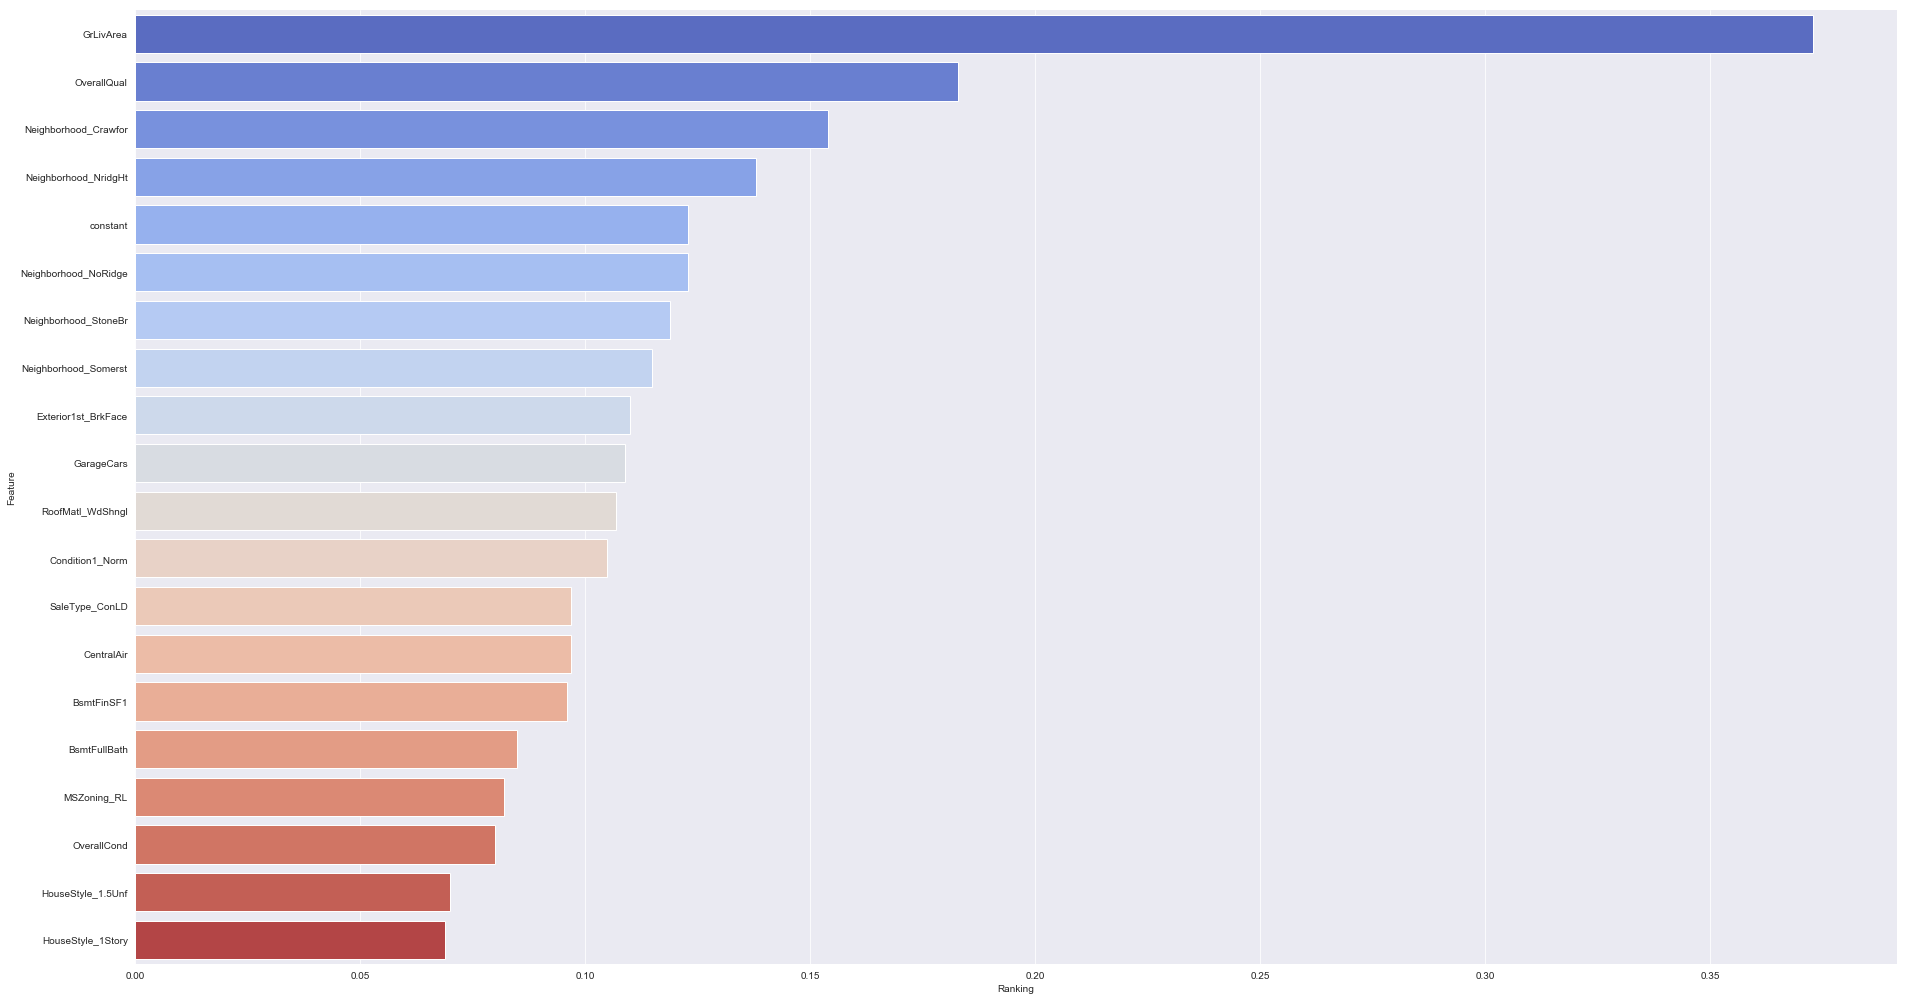

In [137]:
sns.factorplot(x="Ranking", y="Feature", data = ridgedf_q1, kind="bar", 
               size=14, aspect=1.9, palette='coolwarm')
plt.show()

Top 5 predictors after doubling the alpha for ridge regression is:
1. GrLivArea
2. OverallQual
3. Neighborhood_Crawfor
4. Neighborhood_NridgHt
5. Neighborhood_NoRid

**Coding for Question 3 in Subjective Questions**

In [138]:
#lets drop the top 5 predictor features and perform Lasso Regression again
X_train_new = X_train.drop(['GrLivArea', 'Neighborhood_CollgCr', 'OverallQual', 'Neighborhood_NoRidge', 'Neighborhood_Somerst'], axis = 1)
X_test_new = X_test.drop(['GrLivArea', 'Neighborhood_CollgCr', 'OverallQual', 'Neighborhood_NoRidge', 'Neighborhood_Somerst'], axis = 1)

In [139]:
#Performing Lasso Regression
lasso_q2 = Lasso(alpha = 0.001, random_state = 100)
lasso_q2.fit(X_train_new, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=100,
      selection='cyclic', tol=0.0001, warm_start=False)

In [140]:
#predictions on the train and test sets
y_train_pred_q2 = lasso_q2.predict(X_train_new)
r2_lasso_train_q2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred_q2)
print(r2_lasso_train_q2)

0.9140006955404602


In [141]:
y_test_pred_q2 = lasso_q2.predict(X_test_new)
r2_lasso_test_q2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred_q2)
print(r2_lasso_test_q2)

0.8548767544097672


In [142]:
#Returns the mean squared error; we'll take a square root
rmse_lasso_q2 = np.sqrt(mean_squared_error(y_test, y_test_pred_q2))
print(rmse_lasso_q2)

0.30782345339121


In [143]:
# lasso model parameters
model_parameters = list(lasso_q2.coef_)
model_parameters.insert(0, lasso_q2.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list_parameters_lasso = list(zip(cols, model_parameters))

In [144]:
lassodf_q2 = pd.DataFrame(list_parameters_lasso, columns = ['Feature', 'Ranking'])
lassodf_q2.head()

,Feature,Ranking
0,constant,0.103
1,MSSubClass,0.000
2,LotFrontage,0.015
3,LotArea,0.087
4,Street,0.000


In [145]:
lassodf_q2 = lassodf_q2.sort_values('Ranking', ascending=False)

In [146]:
lassodf_q2 = lassodf_q2.head(20)

In [147]:
lassodf_q2

,Feature,Ranking
132,RoofMatl_Membran,0.380
52,age_house,0.368
86,Neighborhood_OldTown,0.292
200,MiscFeature_Shed,0.291
191,GarageType_Attchd,0.242
72,Neighborhood_BrkSide,0.237
136,RoofMatl_WdShake,0.216
31,KitchenAbvGr,0.157
112,BldgType_2fmCon,0.130
36,FireplaceQu,0.129


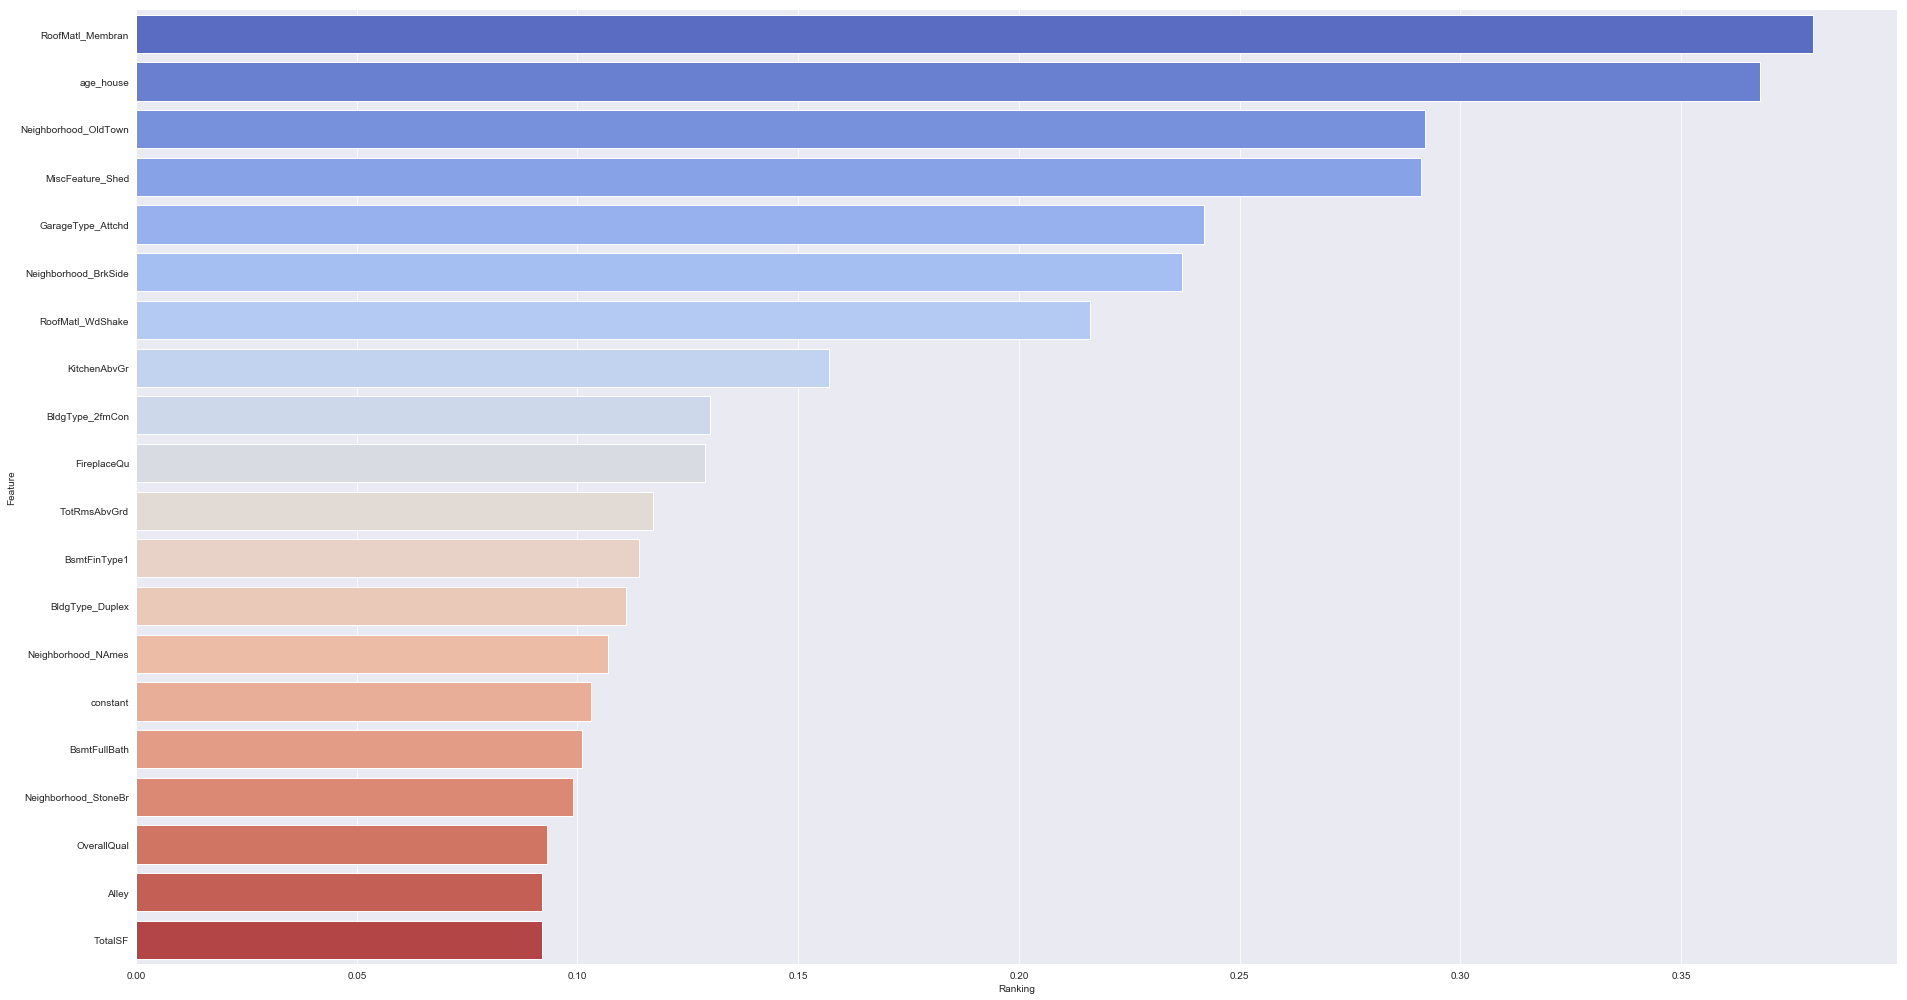

In [148]:
sns.factorplot(x="Ranking", y="Feature", data = lassodf_q2, kind="bar", 
               size=14, aspect=1.9, palette='coolwarm')
plt.show()

The top 5 predcitor variables after removing the existing top 5 variables are:
1. RoofMatl_Membran
2. age_house
3. Neighborhood_OldTown
4. MiscFeature_Shed
5. GarageType_Attch

**Summarising the Scores**

In [149]:
#Lasso Regression
print("Train R2 Score Lasso : ", r2_train_orig)
print("Test R2 Score Lasso : ", r2_test_orig)
print("RMSE Lasso : ", rmse_lasso_orig)

Train R2 Score Lasso :  0.9365077663950884
Test R2 Score Lasso :  0.8782153851700663
RMSE Lasso :  0.28198722147590816


From the above, we can observe the R2 for Train and Test for Lasso Regression are 93.6% and 87.8% respectively. Also the RMSE value is 0.28 which is actually good for our model.

In [150]:
#Ridge Regression
print("Train R2 Score Ridge : ", r2_train_ridge)
print("Test R2 Score Ridge : ", r2_test_ridge)
print("RMSE Ridge : ", rmse_ridge_orig)

Train R2 Score Ridge :  0.9356755372667026
Test R2 Score Ridge :  0.8885884573971399
RMSE Ridge :  0.2697107822259833


From the above, we can observe the R2 for Train and Test for Ridge Regression are 93.5% and 88.8% respectively. Also the RMSE value is 0.26 which is actually good for our model.

In [151]:
#Lasso Regression after doubling optimal alpha
print("Train R2 Score Lasso Q1 : ", r2_lasso_train_q1)
print("Test R2 Score Lasso Q1 : ", r2_lasso_test_q1)
print("RMSE Lasso Q1 : ", rmse_lasso_q1)

Train R2 Score Lasso Q1 :  0.9217100213818047
Test R2 Score Lasso Q1 :  0.884241146349827
RMSE Lasso Q1 :  0.2749225246944462


In [152]:
#Ridge Regression after doubling optimal alpha
print("Train R2 Score Ridge Q1 : ", r2_ridge_train_q1)
print("Test R2 Score Ridge Q1 : ", r2_ridge_test_q1)
print("RMSE Ridge Q1 : ", rmse_ridge_q1)

Train R2 Score Ridge Q1 :  0.9301514629526173
Test R2 Score Ridge Q1 :  0.8908440998225872
RMSE Ridge Q1 :  0.2669665336654507


In [153]:
#Lasso Regression after removing the top 5 predictor variables
print("Train R2 Score Lasso Q2 : ", r2_lasso_train_q2)
print("Test R2 Score Lasso Q2 : ", r2_lasso_test_q2)
print("RMSE Lasso Q2 : ", rmse_lasso_q2)

Train R2 Score Lasso Q2 :  0.9140006955404602
Test R2 Score Lasso Q2 :  0.8548767544097672
RMSE Lasso Q2 :  0.30782345339121


**Displayin Top 5 Predictors**

In [154]:
#Lasso Regression
lassodf_orig.set_index('Feature', inplace = True)
lassodf_orig.head()

,Ranking
Feature,
GrLivArea,0.445
Neighborhood_Crawfor,0.203
OverallQual,0.177
Neighborhood_NridgHt,0.160
Neighborhood_StoneBr,0.153


In [155]:
#Ridge Regression
ridgedf_orig.set_index('Feature', inplace = True)
ridgedf_orig.head()

,Ranking
Feature,
GrLivArea,0.394
Neighborhood_Crawfor,0.177
RoofMatl_WdShngl,0.172
OverallQual,0.169
Neighborhood_NridgHt,0.162


In [156]:
#Lasso Regression after doubling optimal alpha
lassodf_q1.set_index('Feature', inplace = True)
lassodf_q1.head()

,Ranking
Feature,
GrLivArea,0.429
OverallQual,0.200
Neighborhood_Crawfor,0.164
Neighborhood_NridgHt,0.139
Neighborhood_Somerst,0.136


In [157]:
#Ridge Regression after doubling optimal alpha
ridgedf_q1.set_index('Feature', inplace = True)
ridgedf_q1.head()

,Ranking
Feature,
GrLivArea,0.373
OverallQual,0.183
Neighborhood_Crawfor,0.154
Neighborhood_NridgHt,0.138
constant,0.123


In [158]:
#Lasso Regression after removing the top 5 predictor variables
lassodf_q2.set_index('Feature', inplace = True)
lassodf_q2.head()

,Ranking
Feature,
RoofMatl_Membran,0.380
age_house,0.368
Neighborhood_OldTown,0.292
MiscFeature_Shed,0.291
GarageType_Attchd,0.242


From all the above points, it is better to go with the Lasso Model as it will help in feature elimination as well whereas Ridge includes all the fetaures for its calculation.